In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import importlib
from astropy.time import Time

x = glob.glob('./additional/*') #2014 data

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry
from reduct_funcs import funcs_light_curve

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_light_curve)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#######################################################################################################################
#######################################################################################################################
#Load all data. With 2021 Data
#2022-02-01
#Interrogative. There may be some things unaccountable for
#his is old data
#This is new data
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader() #Make a new data loader but one that loads only the new ones
(target_data_x, zero_pol_data_x, high_pol_data_x)= funcs_utils.sample_data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")
print(len(target_data)+len(zero_pol_data)+len(high_pol_data), "total")

master_list = target_data+zero_pol_data+high_pol_data
print(len(master_list))

##Just get g191. That is not very robust isn't it...
#cal_prod = cp(target_data)
#data_strs = ['g191b2b', 'G191B2B']
#G191_low_pol = funcs_utils.filter_data(zero_pol_data, data_strs, False)

#The function that calibs all the shit
calib_d = funcs_calib_and_plot.calib_pipe(target_data, zero_pol_data , False, False) #This guy

(EECep_pd, EECep_pd_err, EECep_PD_MJD_track)=funcs_polarimetry.calc_PD_stability(calib_d , 'perc', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP')
(EECep_pa, EECep_pa_err, EECep_PA_MJD_track)=funcs_polarimetry.calc_PA_stability(calib_d , 'degree', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP', True) #This little appendage thing is the PA correction

print("Len 2020:", len(EECep_pd),  len(EECep_pd_err), len(EECep_PD_MJD_track))
#######################################################################################################################
#######################################################################################################################

Load all excel data
Load a sample of excel data
41 targets
29 zero pols
50 high pols
120 total
120
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calc Polarization Degree stability
Calc Position Angle stability
Shifting PA...
Len 2020: 41 41 41


In [ ]:
#len(target_data_x)

In [2]:
calib_d_k = funcs_calib_and_plot.calib_pipe(target_data_x, zero_pol_data_x, False, False) 
(EECep_pd_k, EECep_pd_err_k, EECep_PD_MJD_track_k)=funcs_polarimetry.calc_PD_stability(calib_d_k , 'perc', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP')
(EECep_pa_k, EECep_pa_err_k, EECep_PA_MJD_track_k)=funcs_polarimetry.calc_PA_stability(calib_d_k , 'degree', './img_out/stability/calEE_Cep_PD_stab', False,False, False, True, True, 'EECEP', True)

Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calibrating data...
Calc Polarization Degree stability
Calc Position Angle stability
Shifting PA...


In [3]:
EECep_PD_MJD_track_k #at least you know what the problem is... The time correction doesnt add up...

<Time object: scale='utc' format='mjd' value=[59059.98128206 59059.98128206 59059.98128206 59059.98128206]>

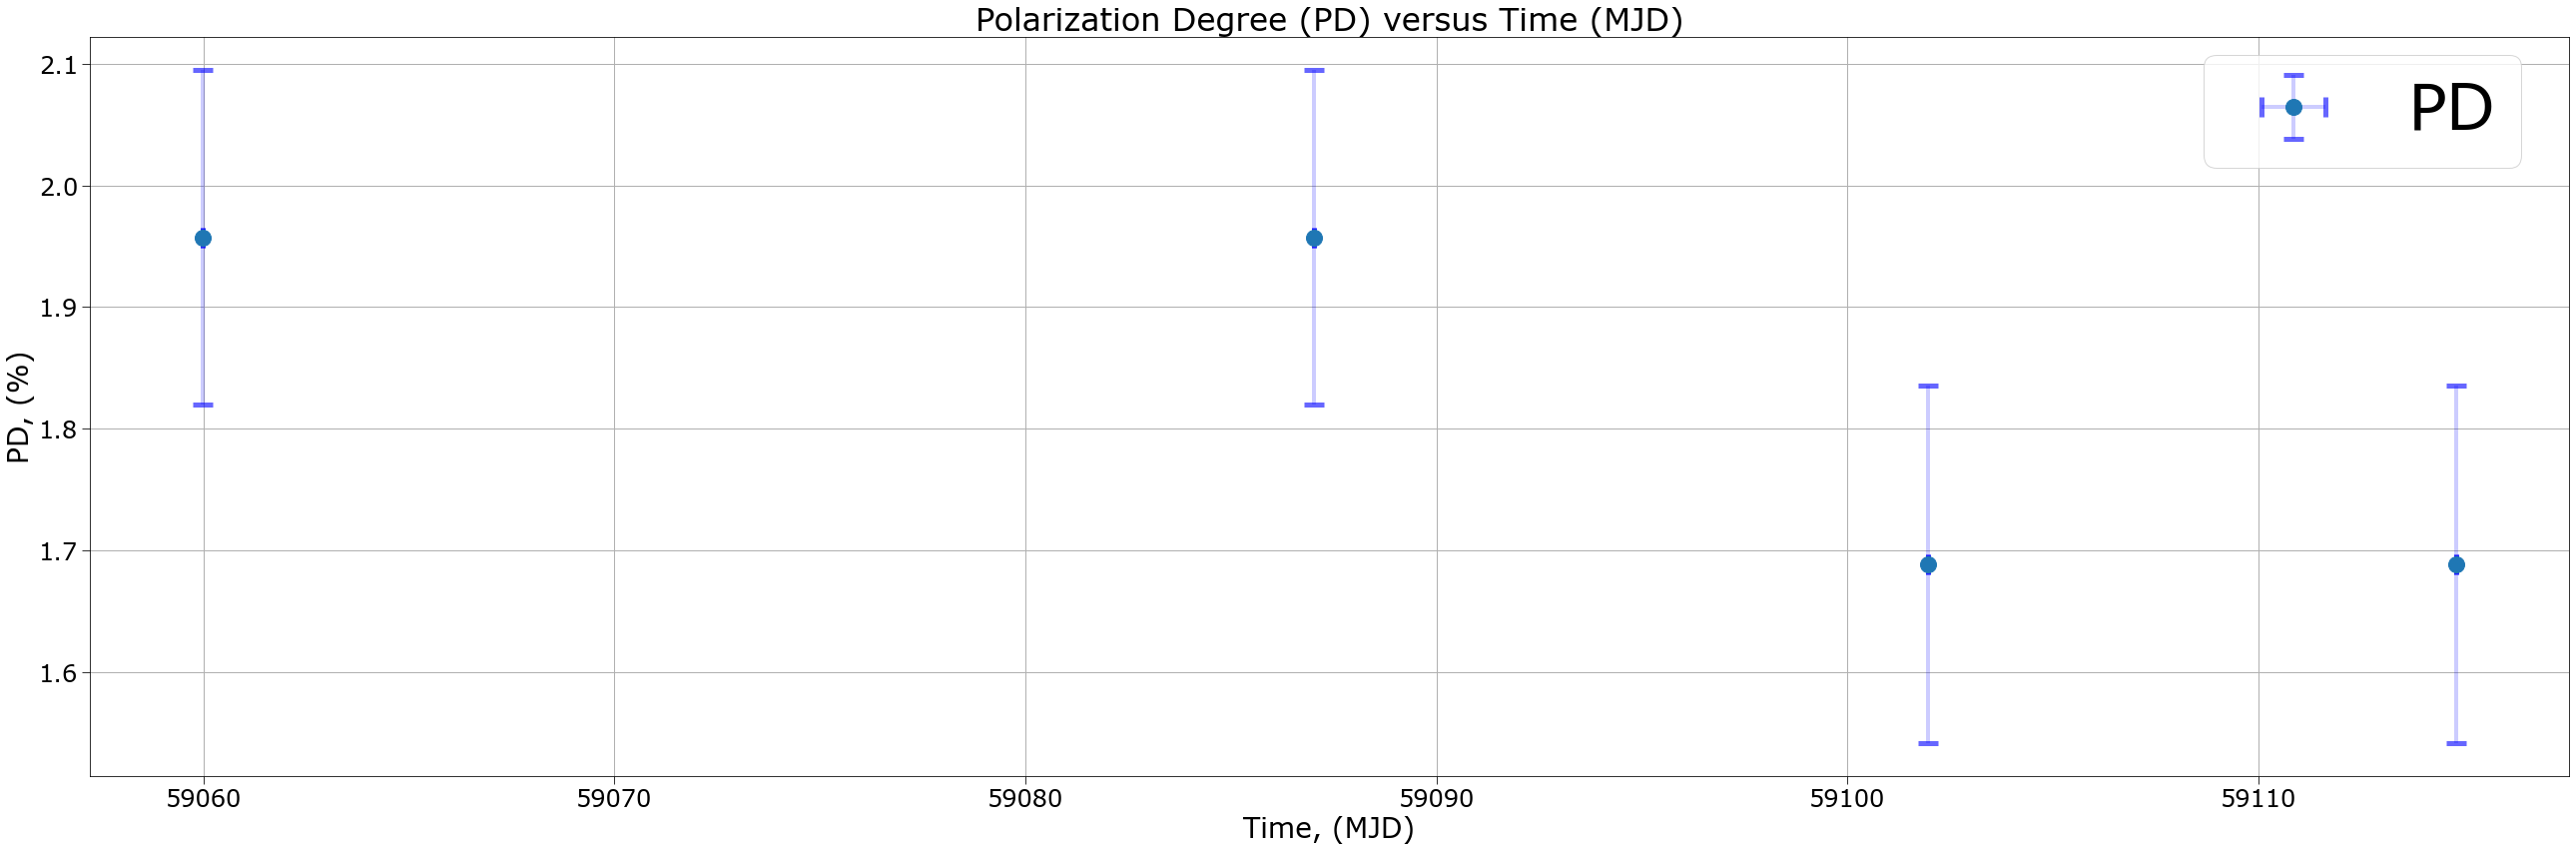

In [4]:
funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track[31:35], EECep_pd_k, EECep_pd_err_k, False,'PD')

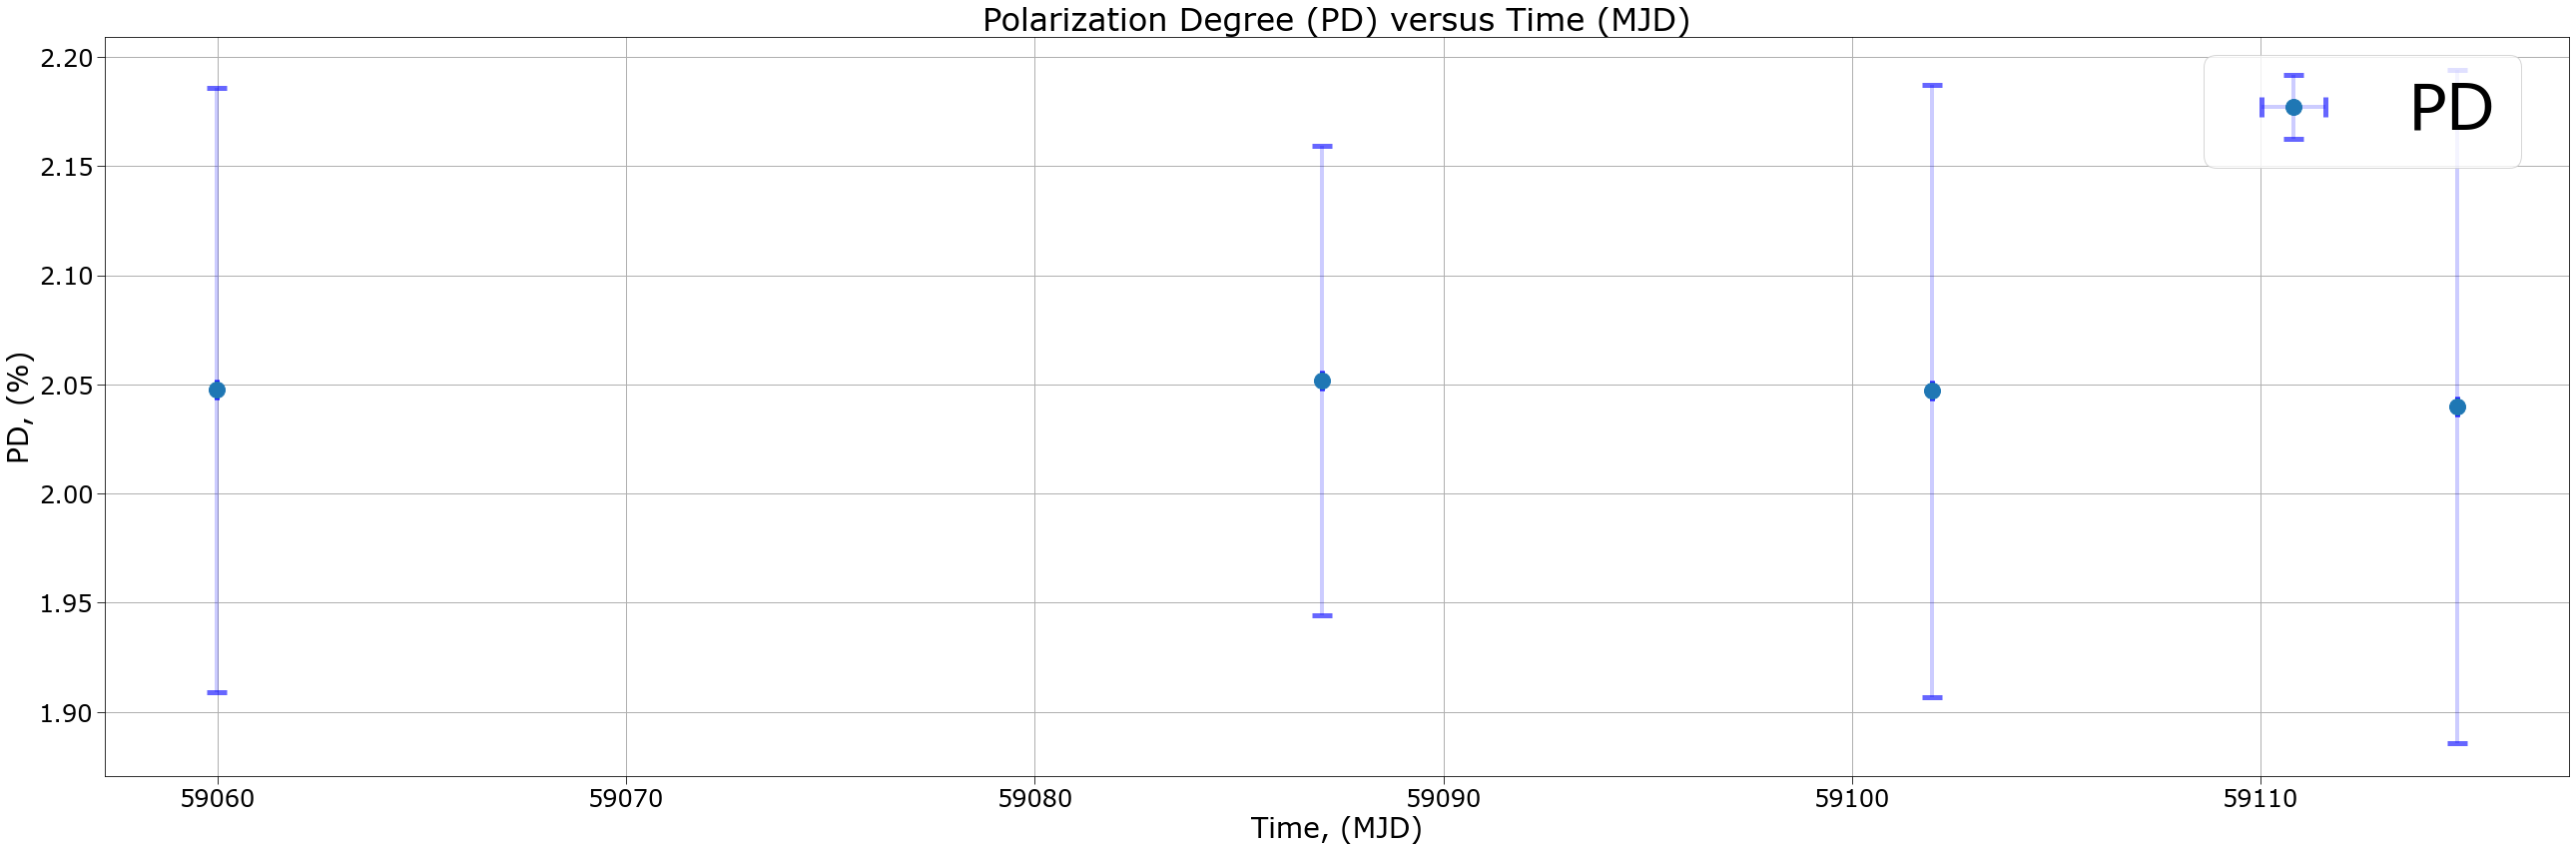

In [5]:
funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track[31:35], EECep_pd[31:35], EECep_pd_err[31:35], False,'PD')

In [ ]:
#EECep_pd, EECep_pd_err
#plt.errorbar(EECep_PD_MJD_track_k.mjd,  EECep_pd_k, yerr =  EECep_pd_err_k           )

#for k in range(0, len(target_data)):
#    print(list(target_data[k].keys())[0])

#Off Eclipse...
#2020-07-29_eecep
#2020-08-25_eecep
#2020-09-08_eecep
#2020-09-22_eecep
#2020-10-08_eecep
#2020-10-28_eecep

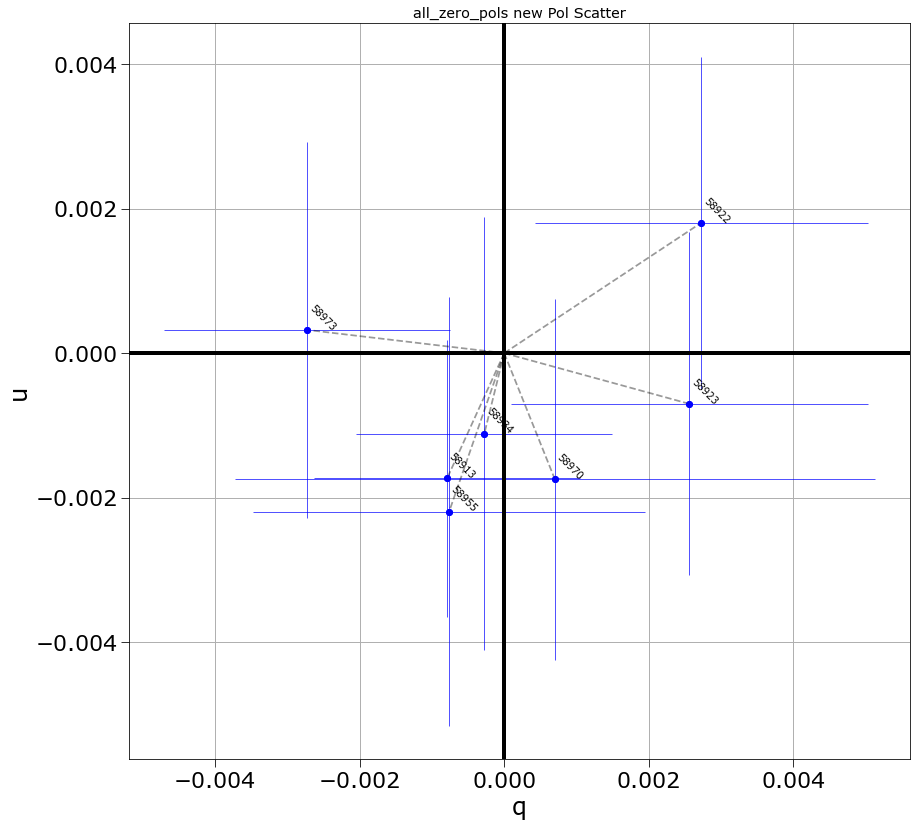

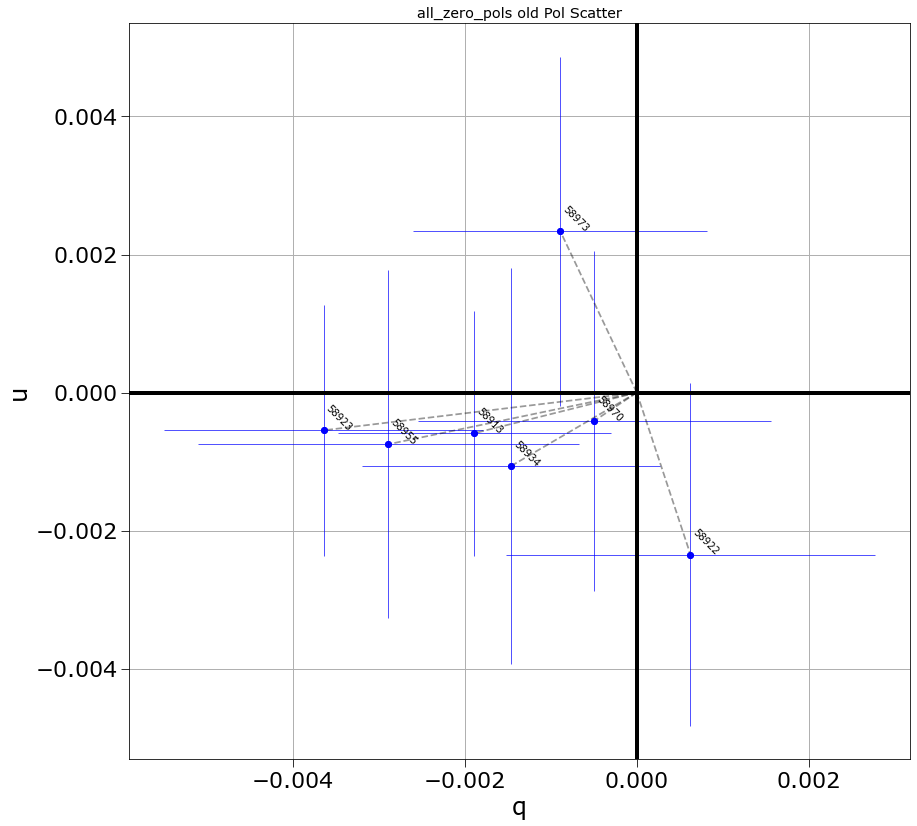

In [6]:
data_strs = ['g191b2b', 'G191B2B']
G191_low_pol_n = funcs_utils.filter_data(zero_pol_data_x, data_strs, False)

q_new, qerr_new, u_new, uerr_new = funcs_polarimetry.q_n_u_single_plot_v1(G191_low_pol_n, 'blue','./img_out/all_zero_pols new', 'zero_pol', True, True, True, True, True,False)

data_strs = ['g191b2b', 'G191B2B']
G191_low_pol_x = funcs_utils.filter_data(zero_pol_data, data_strs, False)

q_ori, qerr_ori, u_ori, uerr_ori = funcs_polarimetry.q_n_u_single_plot_v1(G191_low_pol_x, 'blue','./img_out/all_zero_pols old', 'zero_pol', True, True, True, True, True,False)

Plot q stability


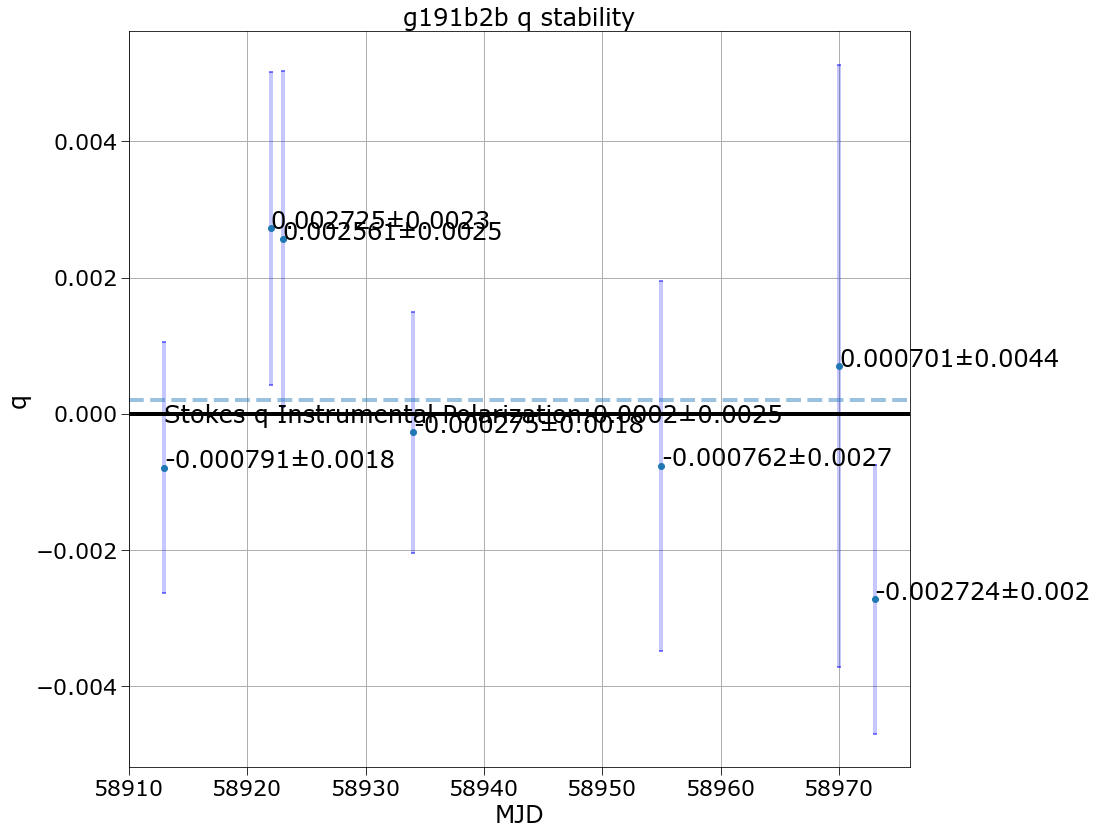

Plot u stability


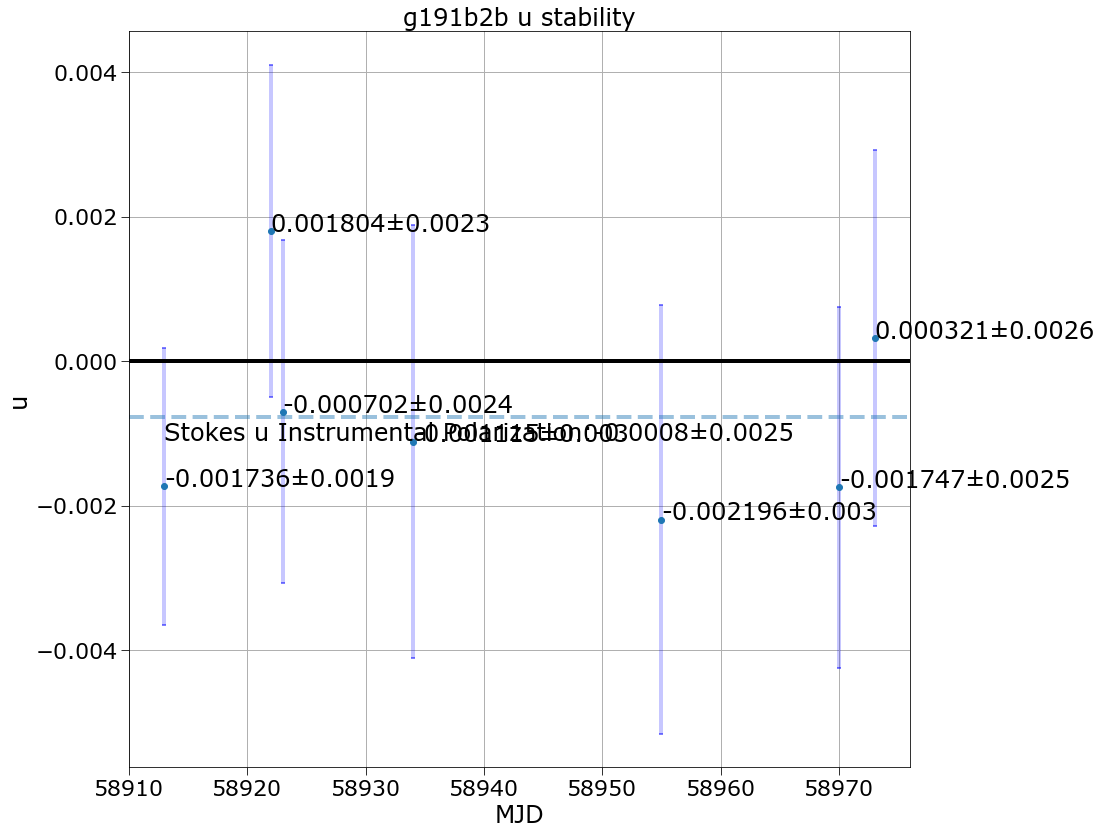

In [7]:
q_cal = funcs_polarimetry.plot_q_u_stability(G191_low_pol_n, 'q', './img_out/stability/EE Cephei_q_stab',  True,False, False, True)
u_cal = funcs_polarimetry.plot_q_u_stability(G191_low_pol_n, 'u', './img_out/stability/EE Cephei_u_stab', True,False, False, True)

Plot q stability


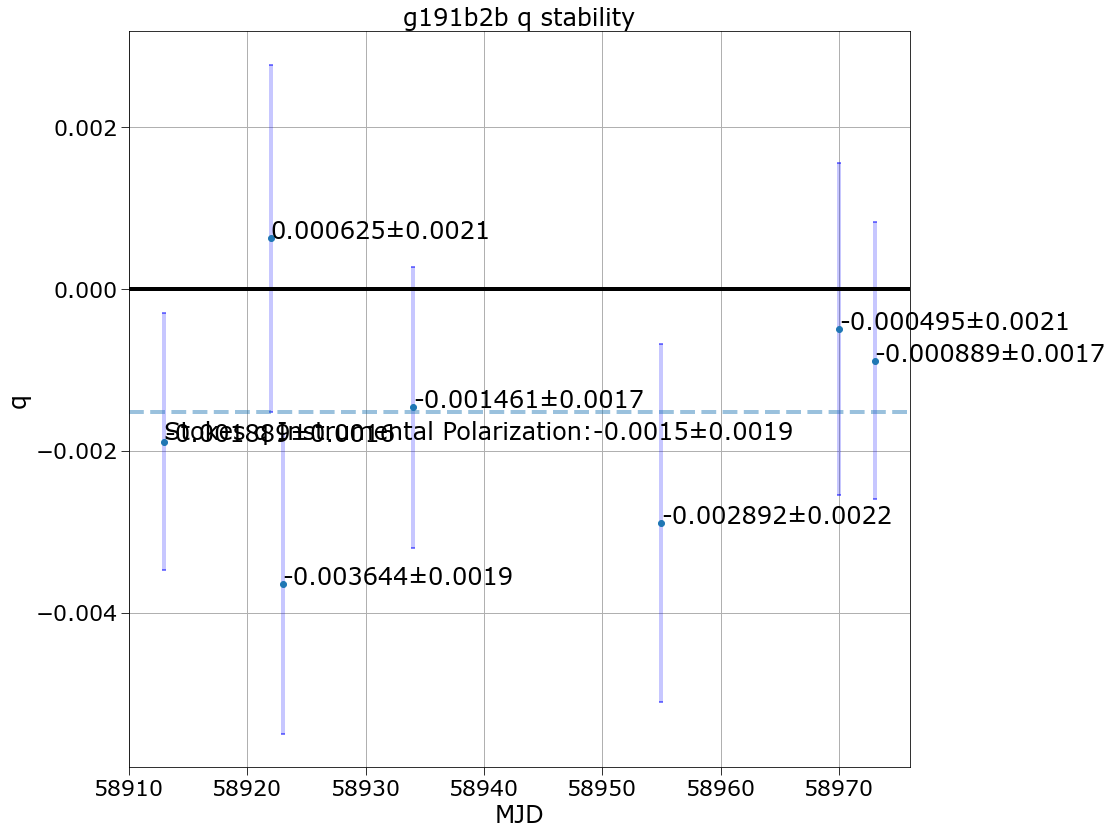

Plot u stability


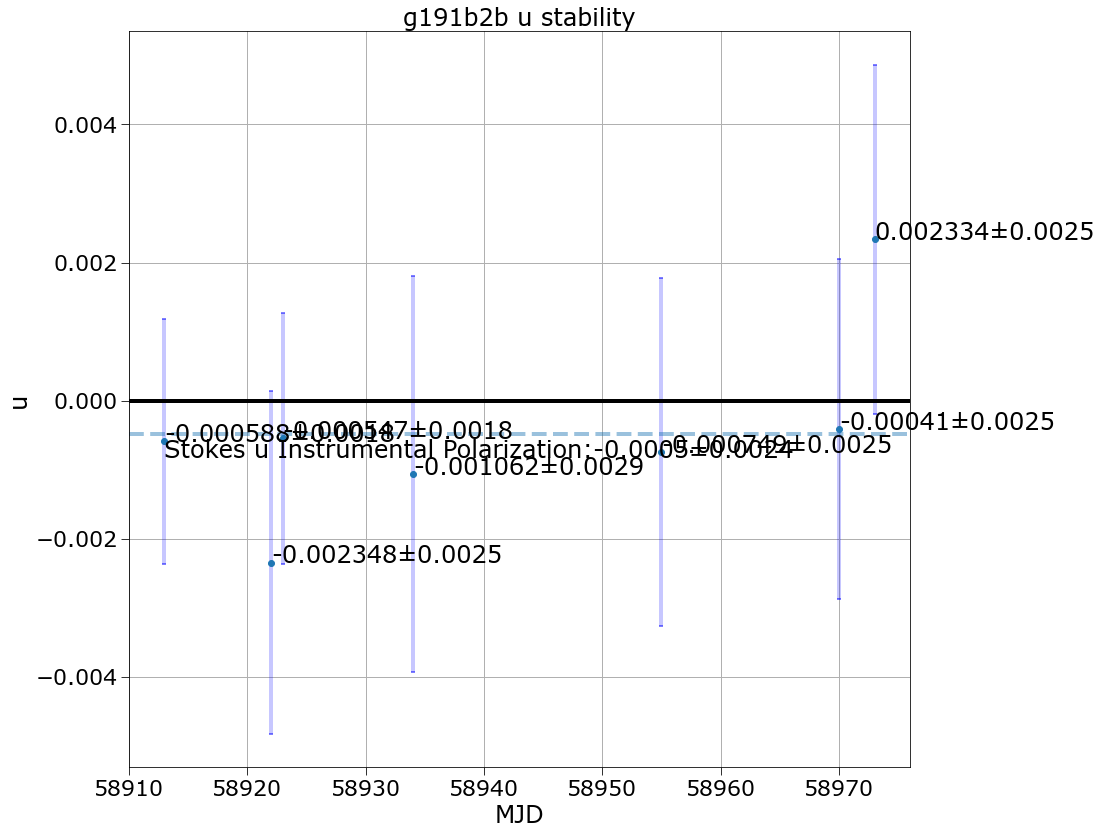

In [8]:
q_cal = funcs_polarimetry.plot_q_u_stability(G191_low_pol_x, 'q', './img_out/stability/EE Cephei_q_stab',  True,False, False, True)
u_cal = funcs_polarimetry.plot_q_u_stability(G191_low_pol_x, 'u', './img_out/stability/EE Cephei_u_stab', True,False, False, True)

In [ ]:
#But the plan is just to combine them line by fugging line
#starting with the 0+1 line (where the data are)

#This little part right here combines scripts. I somewhat don't trust the output. It is prone to name
#convention errors

#Params
MJD = '2020-09-22'
targ_f_name = 'eecep'
p1_strt = 200
p1_end = 260

p3_strt = 260
p3_end = 320

pol_filt = 'R'

p1_filename=MJD+'_'+targ_f_name+'_P1-'+pol_filt+str(p1_strt)+'-'+str(p1_end)+'GRNcorr.xlsx'
p3_filename=MJD+'_'+targ_f_name+'_P3-'+pol_filt+str(p3_strt)+'-'+str(p3_end)+'GRNcorr.xlsx'

p1R_script = './stats/GRN_EE_Cep_Off_Eclipse/' + p1_filename
p3R_script = './stats/GRN_EE_Cep_Off_Eclipse/' + p3_filename
sv_out = './stats/GRN_EE_Cep_Off_Eclipse/'

funcs_utils.combine_excels(p1R_script,  p3R_script, sv_out, MJD, targ_f_name, "R", p1_strt, p3_end)

In [9]:
#original approach

#q_ori, qerr_ori, u_ori, uerr_ori
qs = [-0.001889094,-0.003644315,-0.001460547,-0.002892433,-0.000495494]
q_err = [0.0124885, 0.013085674, 0.013558183, 0.011841079, 0.010086937]
us = [-0.000588093,-0.0005467,-0.001062209,-0.000748733,-0.000409943]
u_err = [0.01241354,0.013261794,0.01369049,0.011743469,0.009956215]

#New approach
qscccd1 = [-0.000755474,0.002560669,-0.000275365,-0.000762115,0.000700665]
qcccd1_err = [0.012272702,0.013014762,0.012931542,0.015070484,0.015036965]
uscccd1 = [-0.001803542,-0.000702473,-0.001115219,-0.002195523,-0.0017468]
ucccd1_err = [0.012113526,0.013023088,0.013023334,0.014893076,0.014832643]

##########################################################################################
#Do the points stay in the same space?
#Second approach

#2 and 3 are the same
#
#-0.000790757	0.012310225	-0.001735632	0.012149619
#0.002560669	0.013014762	-0.000702473	0.013023088
#-0.000275365	0.012931542	-0.001115219	0.013023334
#-0.000762115	0.015070484	-0.002195523	0.014893076
#0.000700665	0.015036965	-0.0017468	0.014832643


#My conclusion from adding the additional data point is that they are mathematically identical. 
#So different methods, same results.
#So if I were to evaluate a new one. It would end up here
#The new procedures errors are approximated. Run it through your pipe and see what happens
qscccd2 = [-0.000790757, 0.002560669, -0.000275365, -0.000762115, 0.000700665 ]
qcccd2_err = [0.012310225, 0.013014762, 0.012931542, 0.015070484, 0.015036965]
uscccd2 = [-0.001735632, -0.000702473, -0.001115219, -0.002195523, -0.0017468]
ucccd2_err = [0.012149619,0.013023088, 0.013023334, 0.014893076, 0.014832643 ]

###########################################################

#
qscccd3 = [-0.000790757, 0.002560669, -0.000275365,-0.000762115, 0.000700665]
qcccd3_err = [0.012310225, 0.013014762,0.012931542,0.015070484,0.015036965]
uscccd3 = [-0.001735632, -0.000702473,-0.001115219,-0.002195523,-0.0017468]
ucccd3_err = [0.012149619, 0.013023088,0.013023334,0.014893076,0.014832643]

In [10]:
#We could do another probe by running STD on all lists and see what comes out

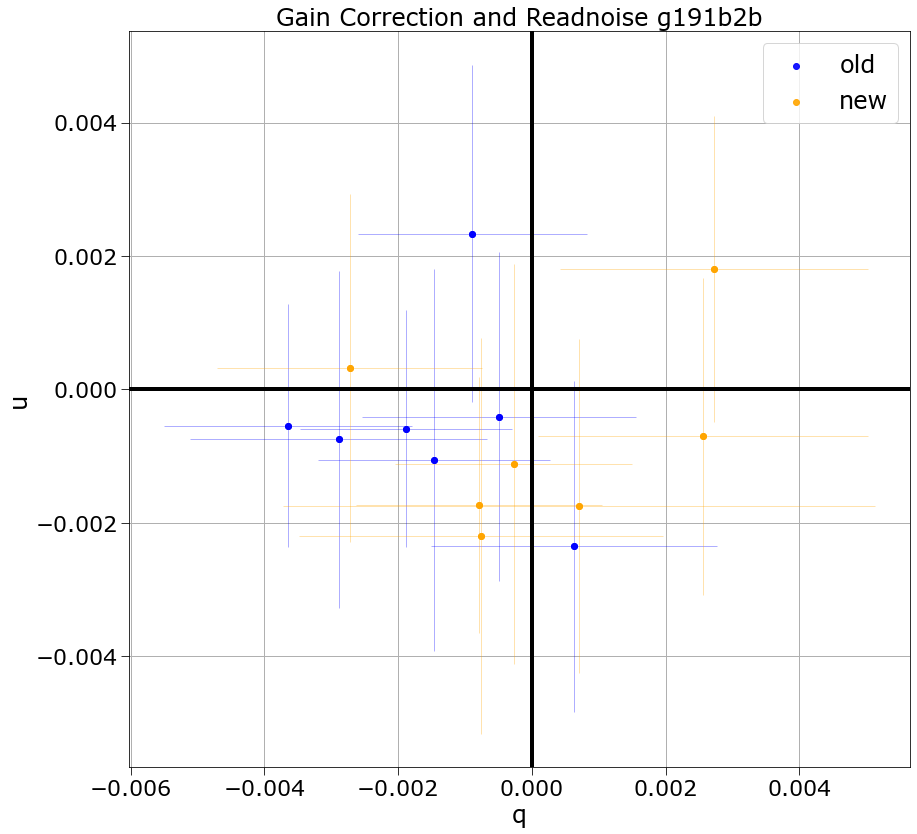

In [11]:
plt.scatter(q_ori, u_ori, color = 'blue', alpha=0.9)
markers, caps, bars =  plt.errorbar(q_ori, u_ori , xerr=qerr_ori , yerr=uerr_ori, color = 'blue', lw=0.75, fmt="o", alpha=0.9)

[bar.set_alpha(0.42) for bar in bars]

plt.scatter(q_new, u_new , color = 'orange', alpha=0.9)
markers, caps, bars =  plt.errorbar(q_new, u_new , xerr=qerr_new , yerr=uerr_new, color = 'orange', lw=0.75, fmt="o", alpha=0.9)

[bar.set_alpha(0.42) for bar in bars]

#The new procedures errors are approximated
#markers, caps, bars =  plt.errorbar(qs, us , xerr=q_err , yerr=u_err, color = 'blue', lw=0.75, fmt="o", alpha=0.9)

#[bar.set_alpha(0.42) for bar in bars]

#CCD Proc two different methods.
#subtract bias, subtract dark, ccdprc(flat, gain)
#This one contains the only deviation
#markers, caps, bars = plt.errorbar(qscccd1, uscccd1, xerr=qcccd1_err  , yerr=ucccd1_err, color = 'orange', lw=0.75, fmt="o", alpha=0.9)

#[bar.set_alpha(0.42) for bar in bars]

#correct gain, |subtract bias, subtract dark, flatfield| 
#markers, caps, bars = plt.errorbar(qscccd2, uscccd2, xerr=qcccd2_err  , yerr=ucccd2_err, color = 'green', lw=0.75, fmt="o", alpha=0.9)

#[bar.set_alpha(0.42) for bar in bars]

#markers, caps, bars = plt.errorbar(qscccd3, uscccd3, xerr=qcccd3_err  , yerr=ucccd3_err, color = 'red', lw=0.75, fmt="o", alpha=0.9)

#[bar.set_alpha(0.9) for bar in bars]
plt.legend(['old', 'new'],fontsize = 24)
plt.yticks(fontsize = 22)
plt.xticks(fontsize = 22)        
plt.ylabel('u', fontsize = 24)
plt.xlabel('q', fontsize = 24)
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')


#plt.xlim(-0.015, 0.015)
#plt.ylim(-0.015, 0.015)

plt.title('Gain Correction and Readnoise g191b2b', fontsize = 24)
plt.grid()


In [12]:
#plot the stab for 

q_list = ['q']
q_err_list = ['q error']
u_list = ['u']
q_err_list = ['u error']
v = []
v_err = []

PD_list = []
PD_err_list = []
PA_list = []
PA_err_list = []

MJD_list = [] #For the new data

data_list_eecep = []

with open(x[0]) as f:
    lines = f.readlines()
    
print("Data lines:", len(lines))

EECEP_data_header = ['q', 'q uncertainty', 
 'u', 'u uncertainty', 
 'v', 'v uncertainty', 
 'PD', 'PD uncertainty', 
 'PA', 'PA uncertainty',
 'Not applicable', 'Not applicable',
 'MJD', 'half observation duration in days',
 'band']

for l in range(0, len(lines)):    
    q =  float(lines[l].split('\t')[0].strip())
    q_err = float(lines[l].split('\t')[1].strip())
    u = float(lines[l].split('\t')[2].strip()) 
    u_err = float(lines[l].split('\t')[3].strip()) 
    
    PD =  float(lines[l].split('\t')[6].strip()) 
    PD_err =  float(lines[l].split('\t')[7].strip())
    
    PA = float(lines[l].split('\t')[8].strip()) 
    PA_err = float(lines[l].split('\t')[9].strip()) 

    MJD = float(lines[l].split('\t')[12].strip())   
    t = Time(MJD, format='mjd', scale='utc')
    
    single_dict={t.iso[:len('2014-08-08')]+'_eecep': (['q',q], 
                                                      ['q error', q_err], 
                                                      ['u', u],
                                                      ['u error', u_err])}
    
    PD_list.append(float(PD))
    PD_err_list.append(float(PD_err))
    
    PA_list.append(float(PA))
    PA_err_list.append(float(PA_err))
    
    MJD_list.append(MJD)
    
    data_list_eecep.append(single_dict)
    
#this is a fudge
#And it fudges things further down the line
#You have overridden it. I do not know why you persist in making these redundant operations
t_MJD_track = Time(MJD_list, format='mjd', scale='utc')
tm_pd = Time(MJD_list, scale='utc',format='mjd')
tm_pa = Time(MJD_list, scale='utc',format='mjd')

print('2014 time track MJD:', t_MJD_track.mjd)
print('2014 time track Date time:', t_MJD_track.fits)
print("Polarization degree:")
for ki in range(0, len(PD_list)):
    print(PD_list[ki]*100,u"\u00B1",PD_err_list[ki]*100)

print("\n")
print("Position Angle:")
for ki in range(0, len(PA_list)):
    print(PA_list[ki],u"\u00B1",PA_err_list[ki])

Data lines: 14
2014 time track MJD: [56877.6331952  56895.79098704 56896.74281626 56897.57629712
 56897.79197732 56903.77310816 56904.7747447  56905.77573142
 56919.77353559 56920.74566841 56922.72980033 57704.60074807
 58272.77951466 58383.70380809]
2014 time track Date time: ['2014-08-08T15:11:48.065' '2014-08-26T18:59:01.280'
 '2014-08-27T17:49:39.325' '2014-08-28T13:49:52.071'
 '2014-08-28T19:00:26.840' '2014-09-03T18:33:16.545'
 '2014-09-04T18:35:37.942' '2014-09-05T18:37:03.194'
 '2014-09-19T18:33:53.475' '2014-09-20T17:53:45.750'
 '2014-09-22T17:30:54.749' '2016-11-12T14:25:04.633'
 '2018-06-03T18:42:30.067' '2018-09-22T16:53:29.019']
Polarization degree:
2.78852607487421 ± 0.323148570509178
3.57069539395001 ± 0.387796514129384
3.0025514248532 ± 0.37389839110655
2.30160998875784 ± 0.340970082595683
2.70908316286322 ± 0.28141293848139004
2.10021551438104 ± 0.111160490349617
2.19547564630121 ± 0.0966400399667521
2.25879145884413 ± 0.0871054683853664
2.16996426474666 ± 0.1313337262

In [15]:
#plt.plot(PA_list)

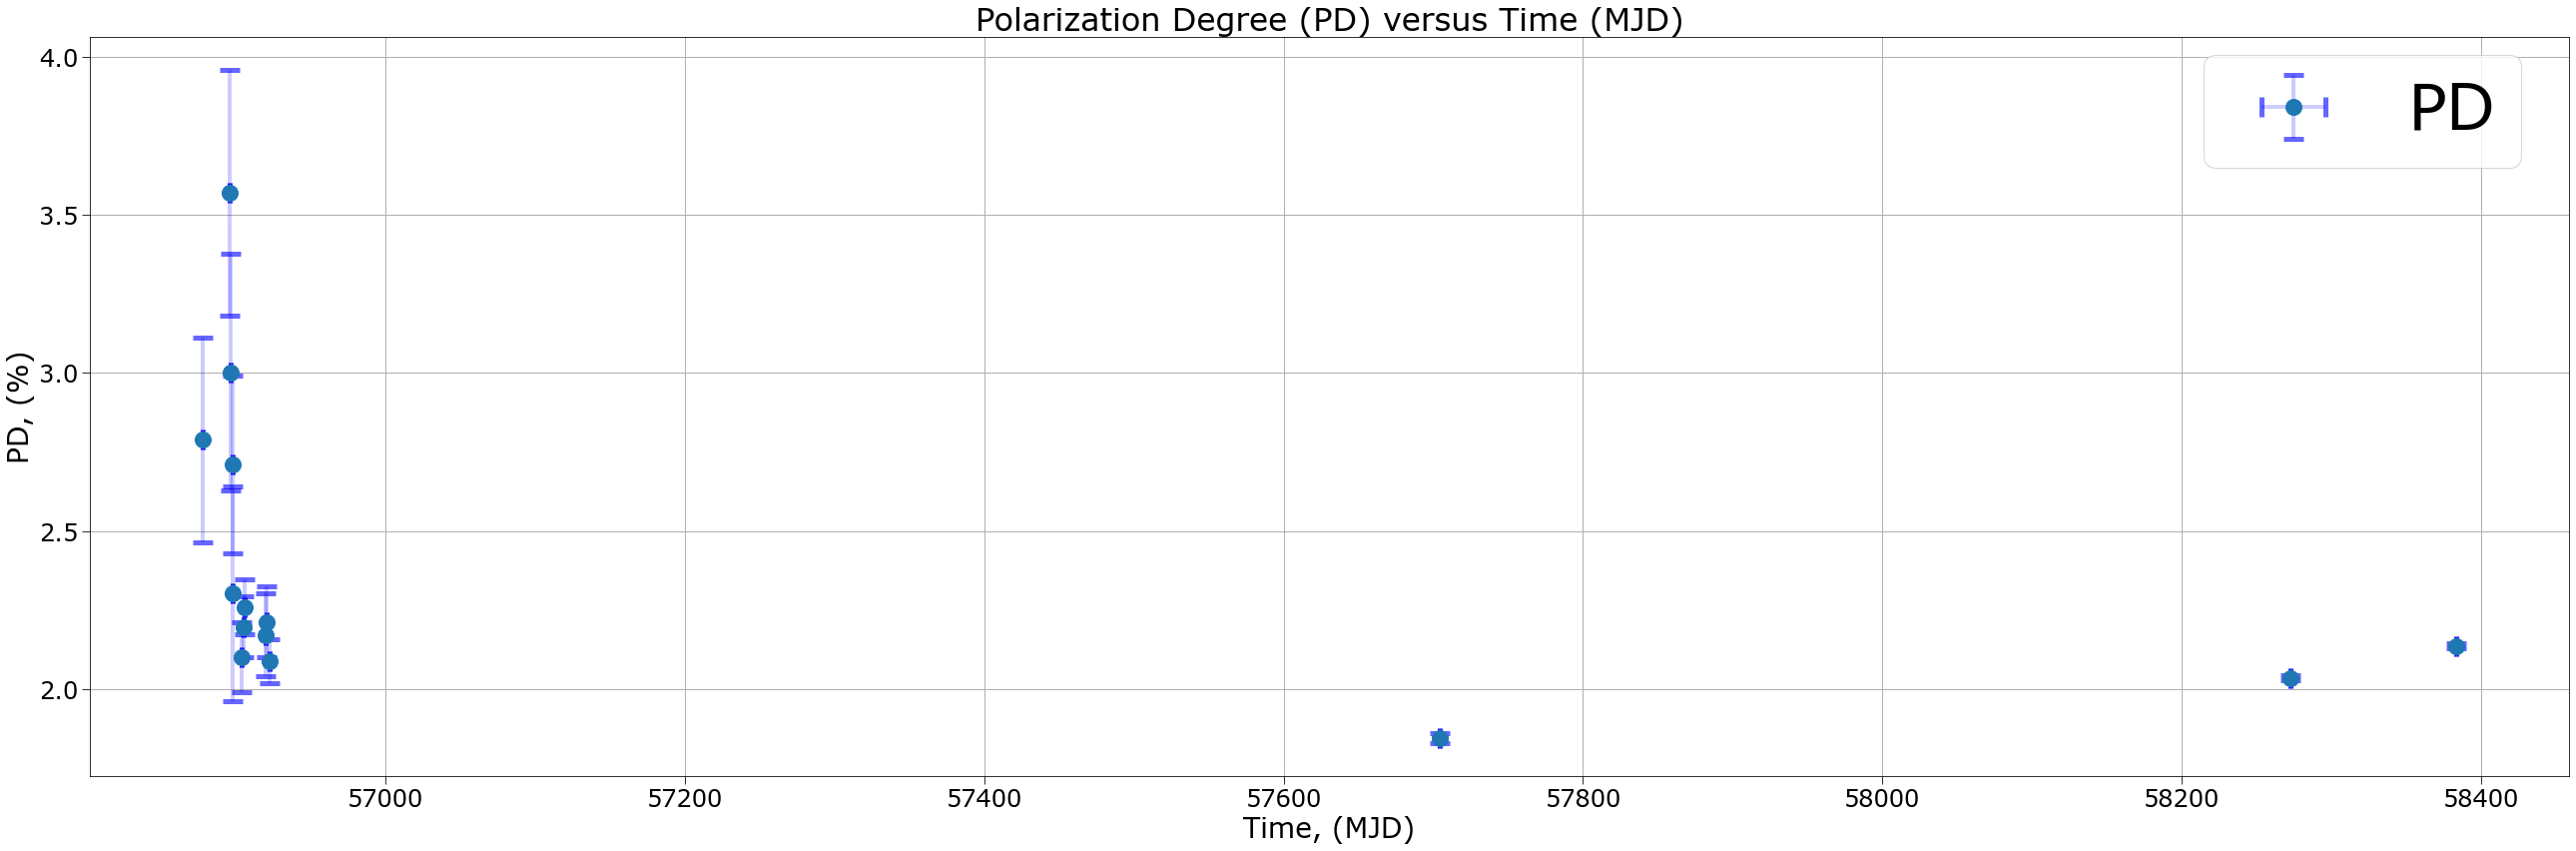

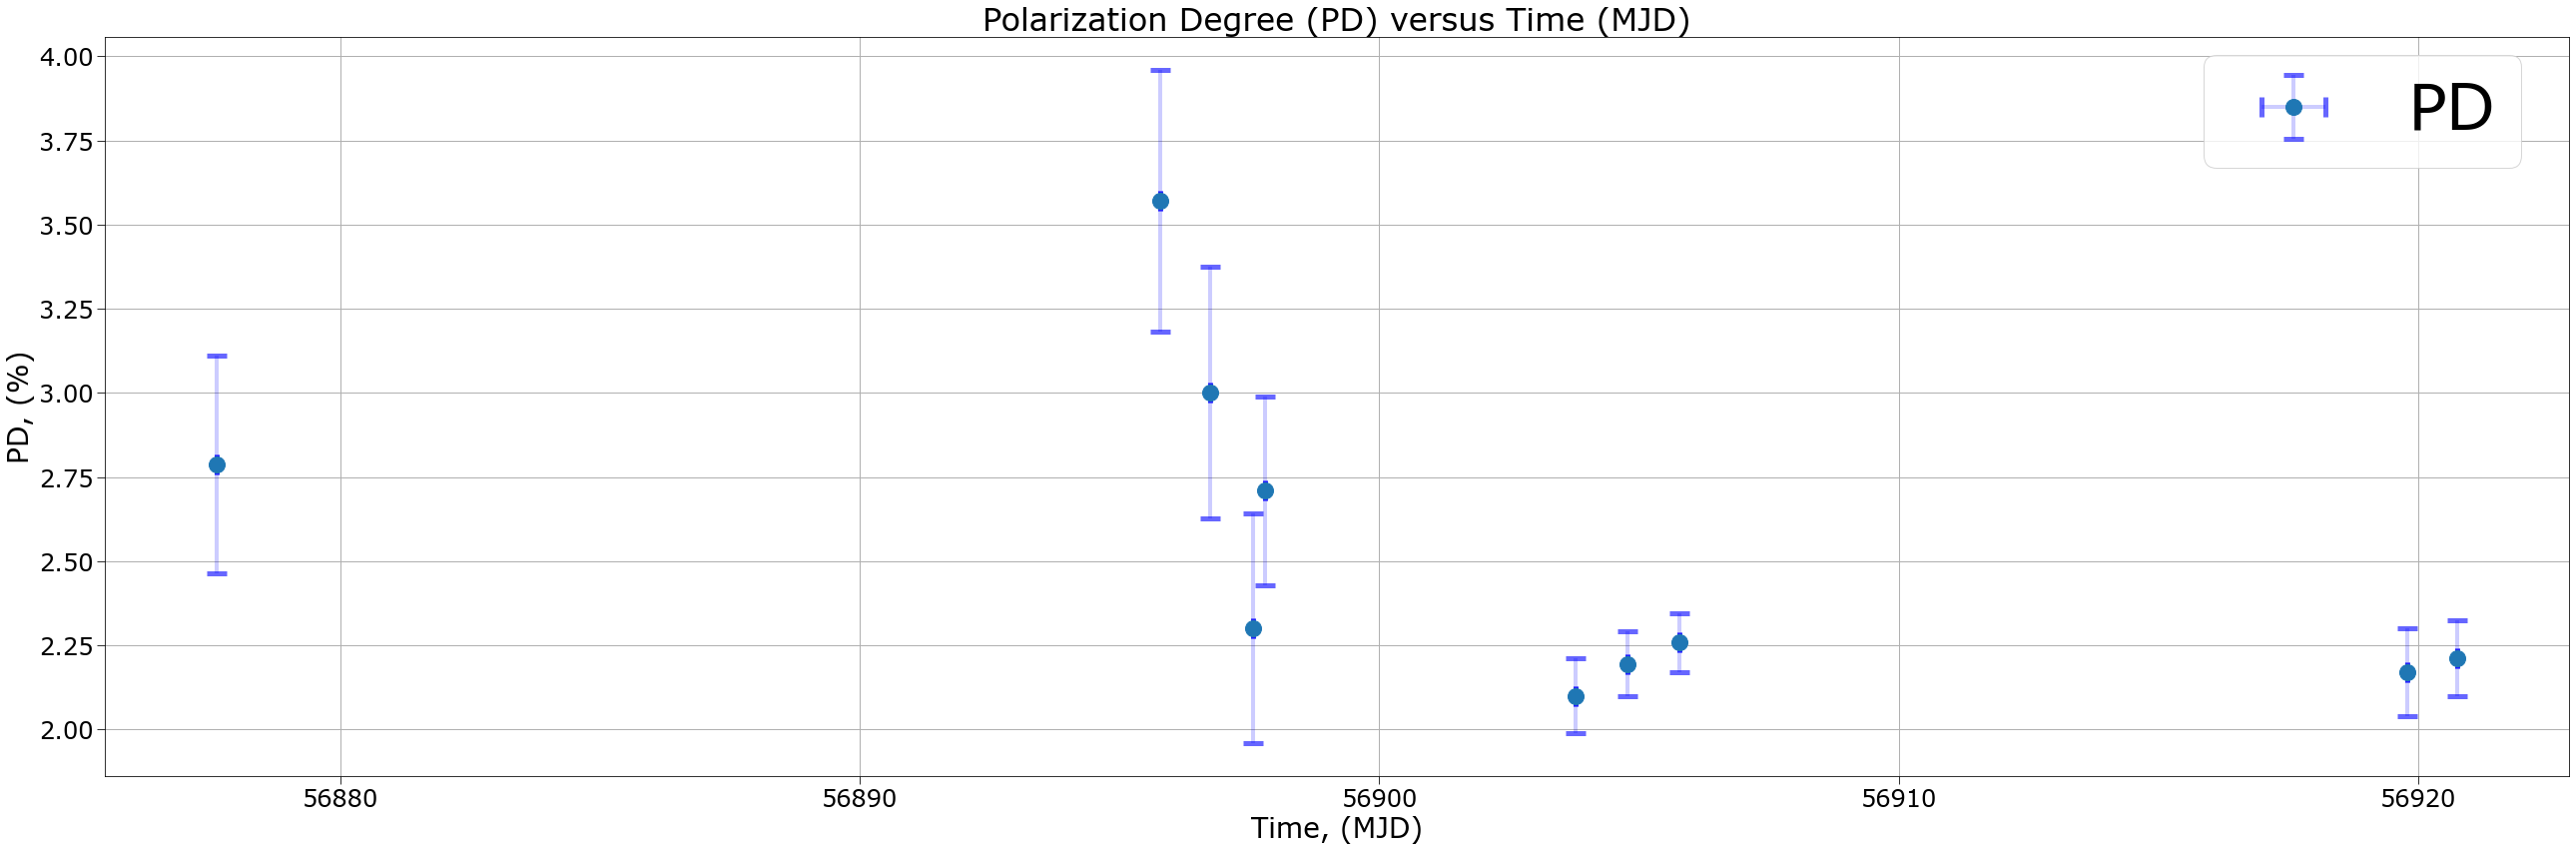

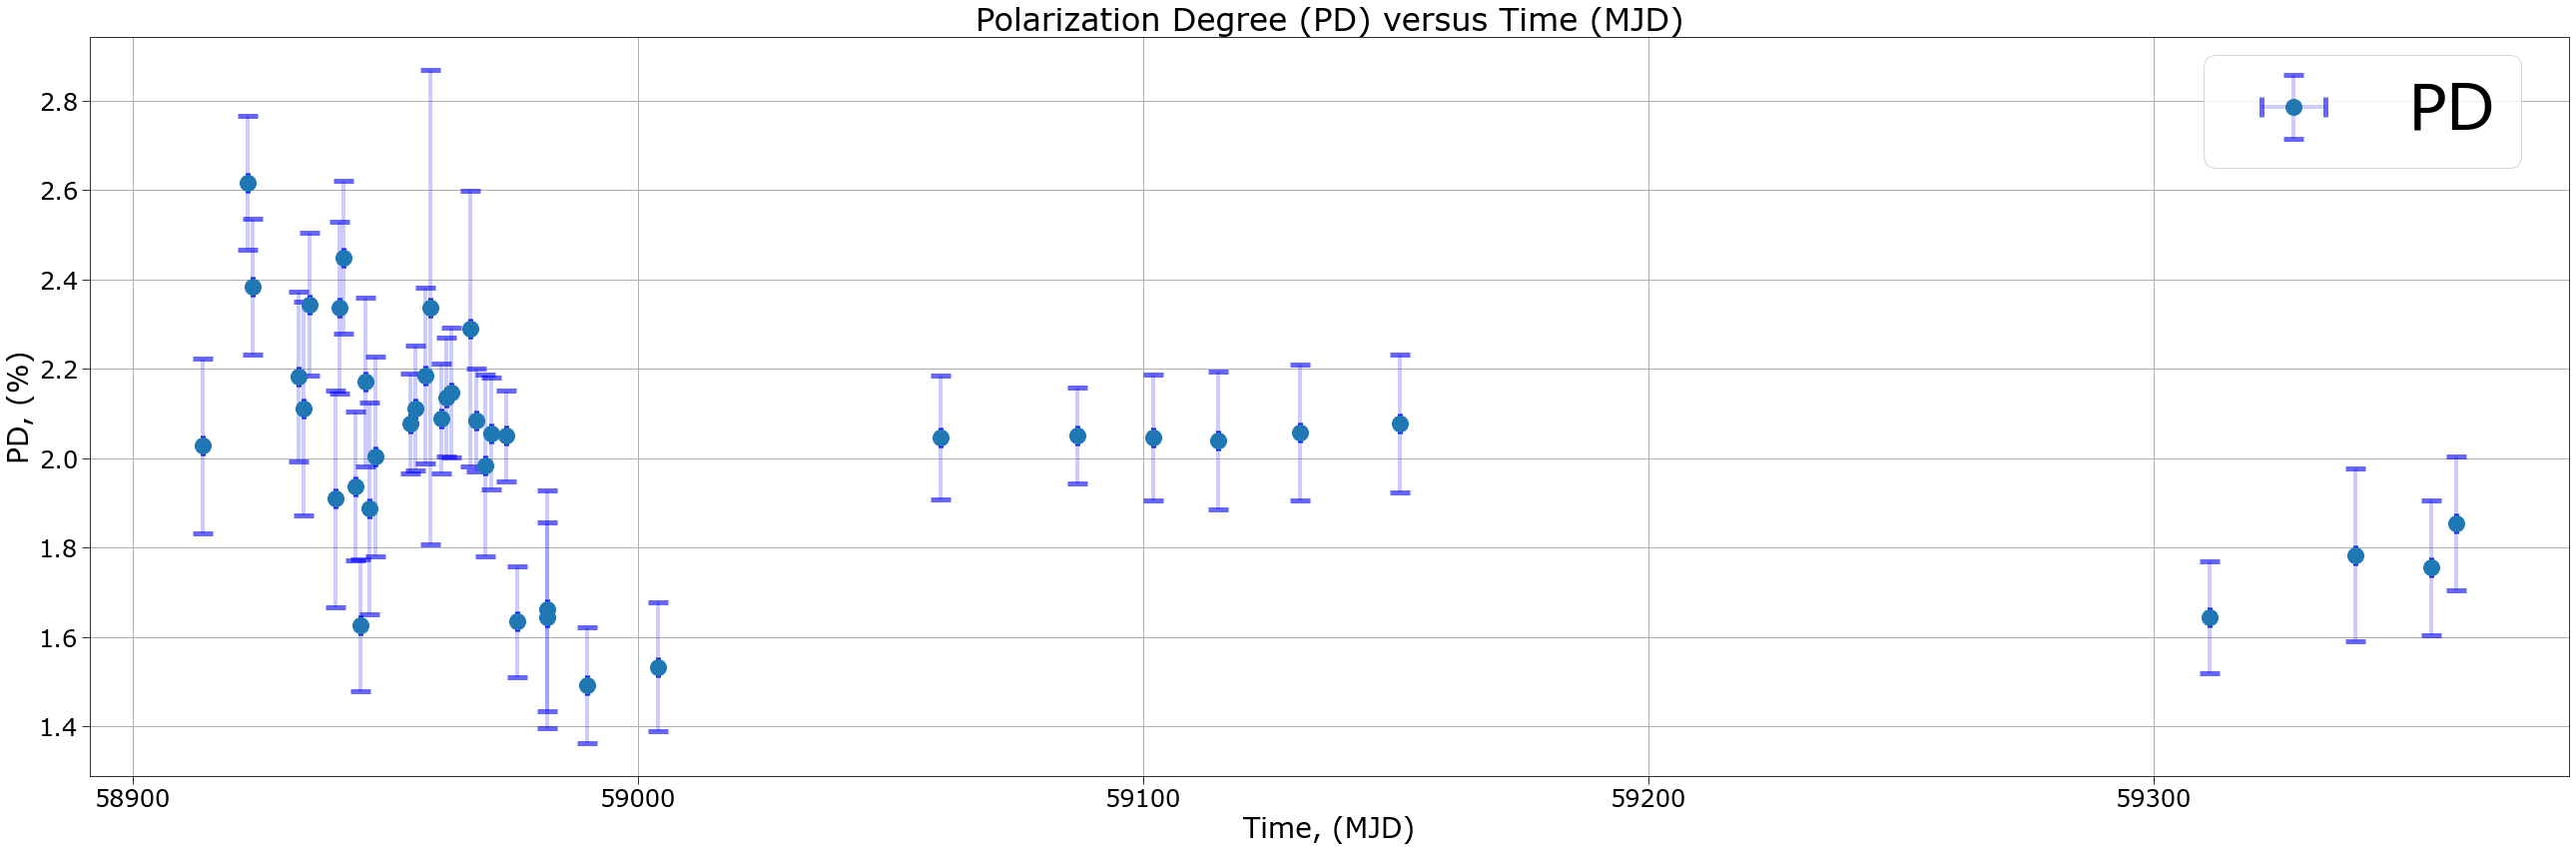

In [13]:
#2014 data. Polarization Degree
#funcs_polarimetry.plot_pol_stab(t_MJD_track, np.array(PD_list), PD_err_list, False,'PD')
funcs_polarimetry.plot_pol_stab(t_MJD_track[:], np.array(PD_list[:])*100, np.array(PD_err_list[:])*100, False,'PD')
funcs_polarimetry.plot_pol_stab(t_MJD_track[:10], np.array(PD_list[:10])*100, np.array(PD_err_list[:10])*100, False,'PD')

#2020 data. Polarization Degree
funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track, EECep_pd, EECep_pd_err, False,'PD')

In [14]:
print("2020")
print("Mid Eclipse:", 58900+((59000-58900)/2)    )
print("Mid 0.25 phase:",np.mean(np.array(EECep_PD_MJD_track[-4:].mjd))               )
print("Distance in MJD to 0.2 phase:", (np.mean(np.array(EECep_PD_MJD_track[-4:].mjd)))- (58900+((59000-58900)/2))    )

print("\n")
print("2014")
print("The 0.2 phase in 2014 should happen at MJD:", np.mean(t_MJD_track.mjd[:-3]) + (np.mean(np.array(EECep_PD_MJD_track[-4:].mjd)))- (58900+((59000-58900)/2))   )

2020
Mid Eclipse: 58950.0
Mid 0.25 phase: 59341.52811992187
Distance in MJD to 0.2 phase: 391.52811992187344


2014
The 0.2 phase in 2014 should happen at MJD: 57295.44701642588


In [15]:
len(t_MJD_track[:]), len(EECep_PA_MJD_track)

(14, 41)

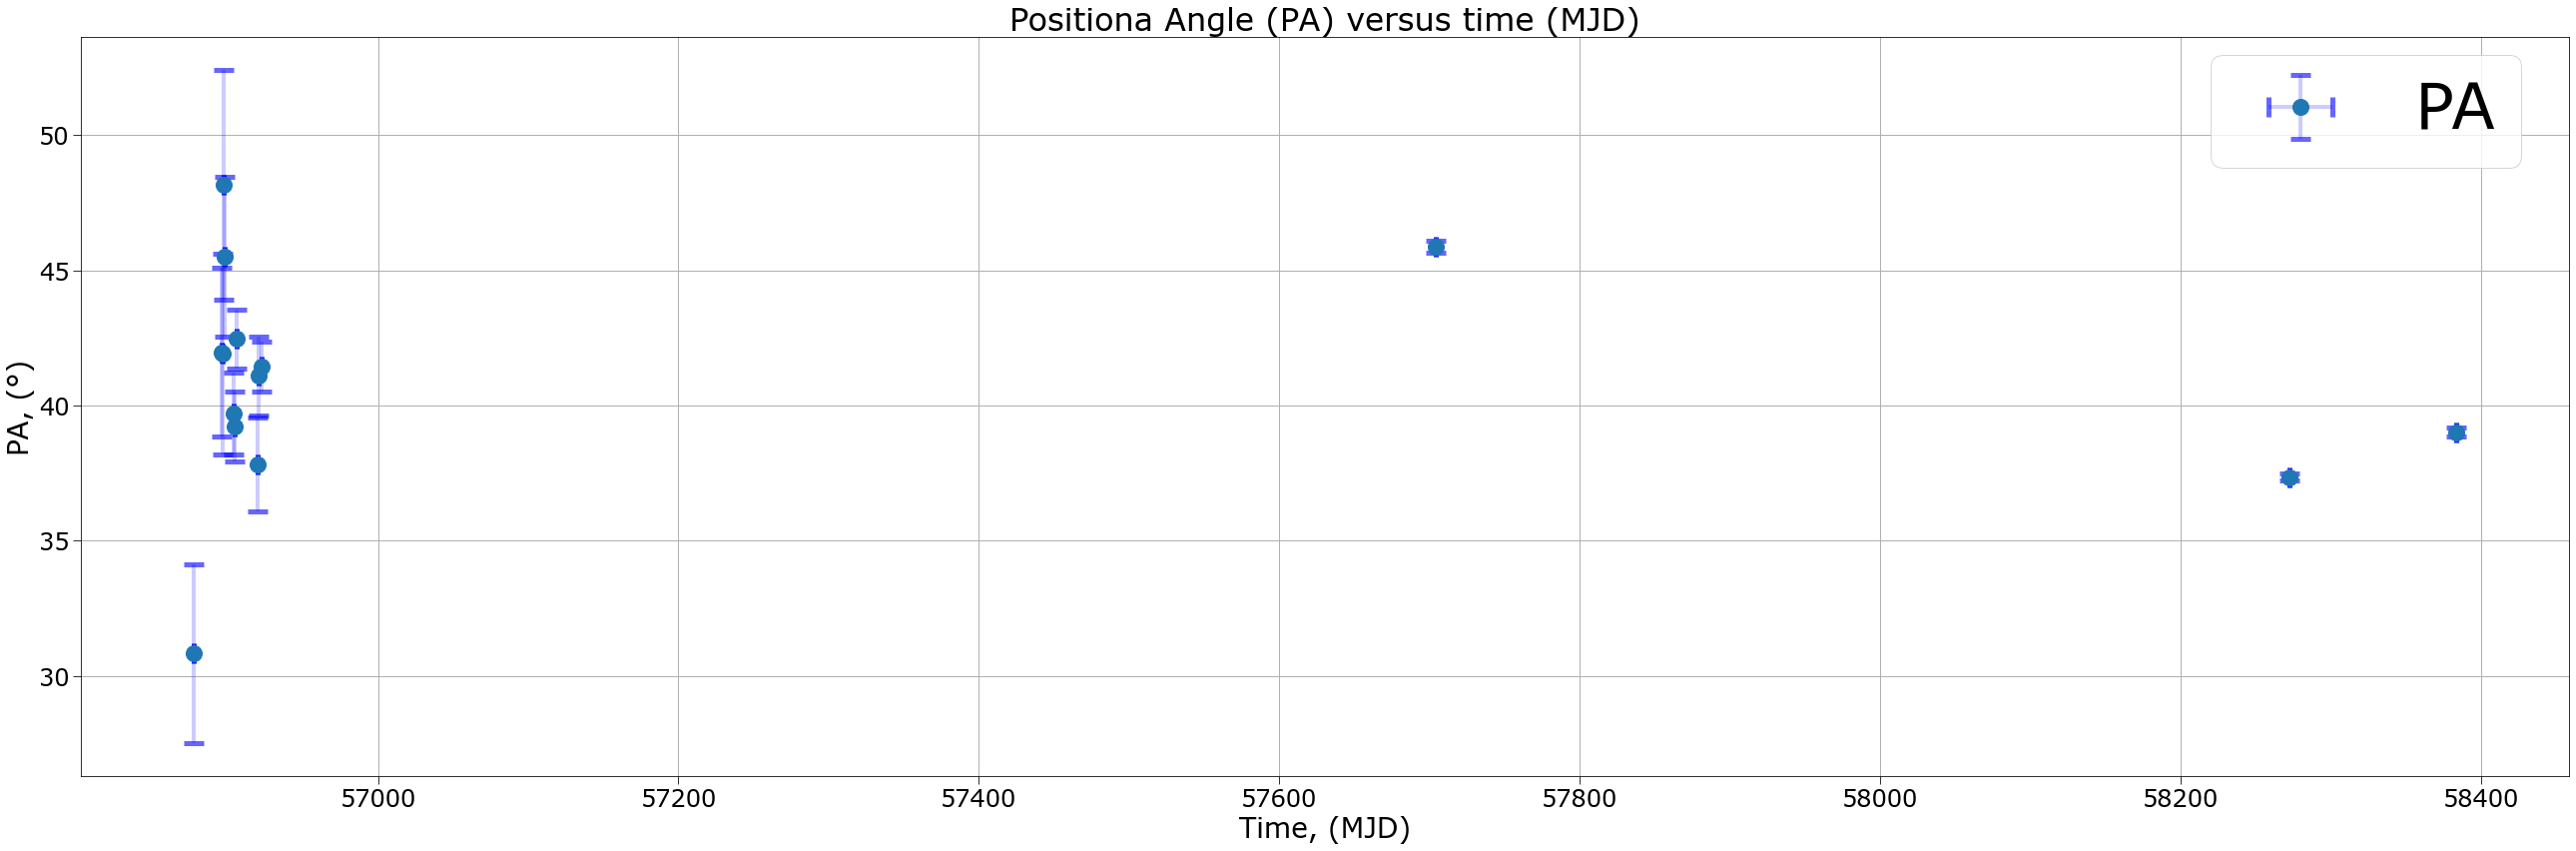

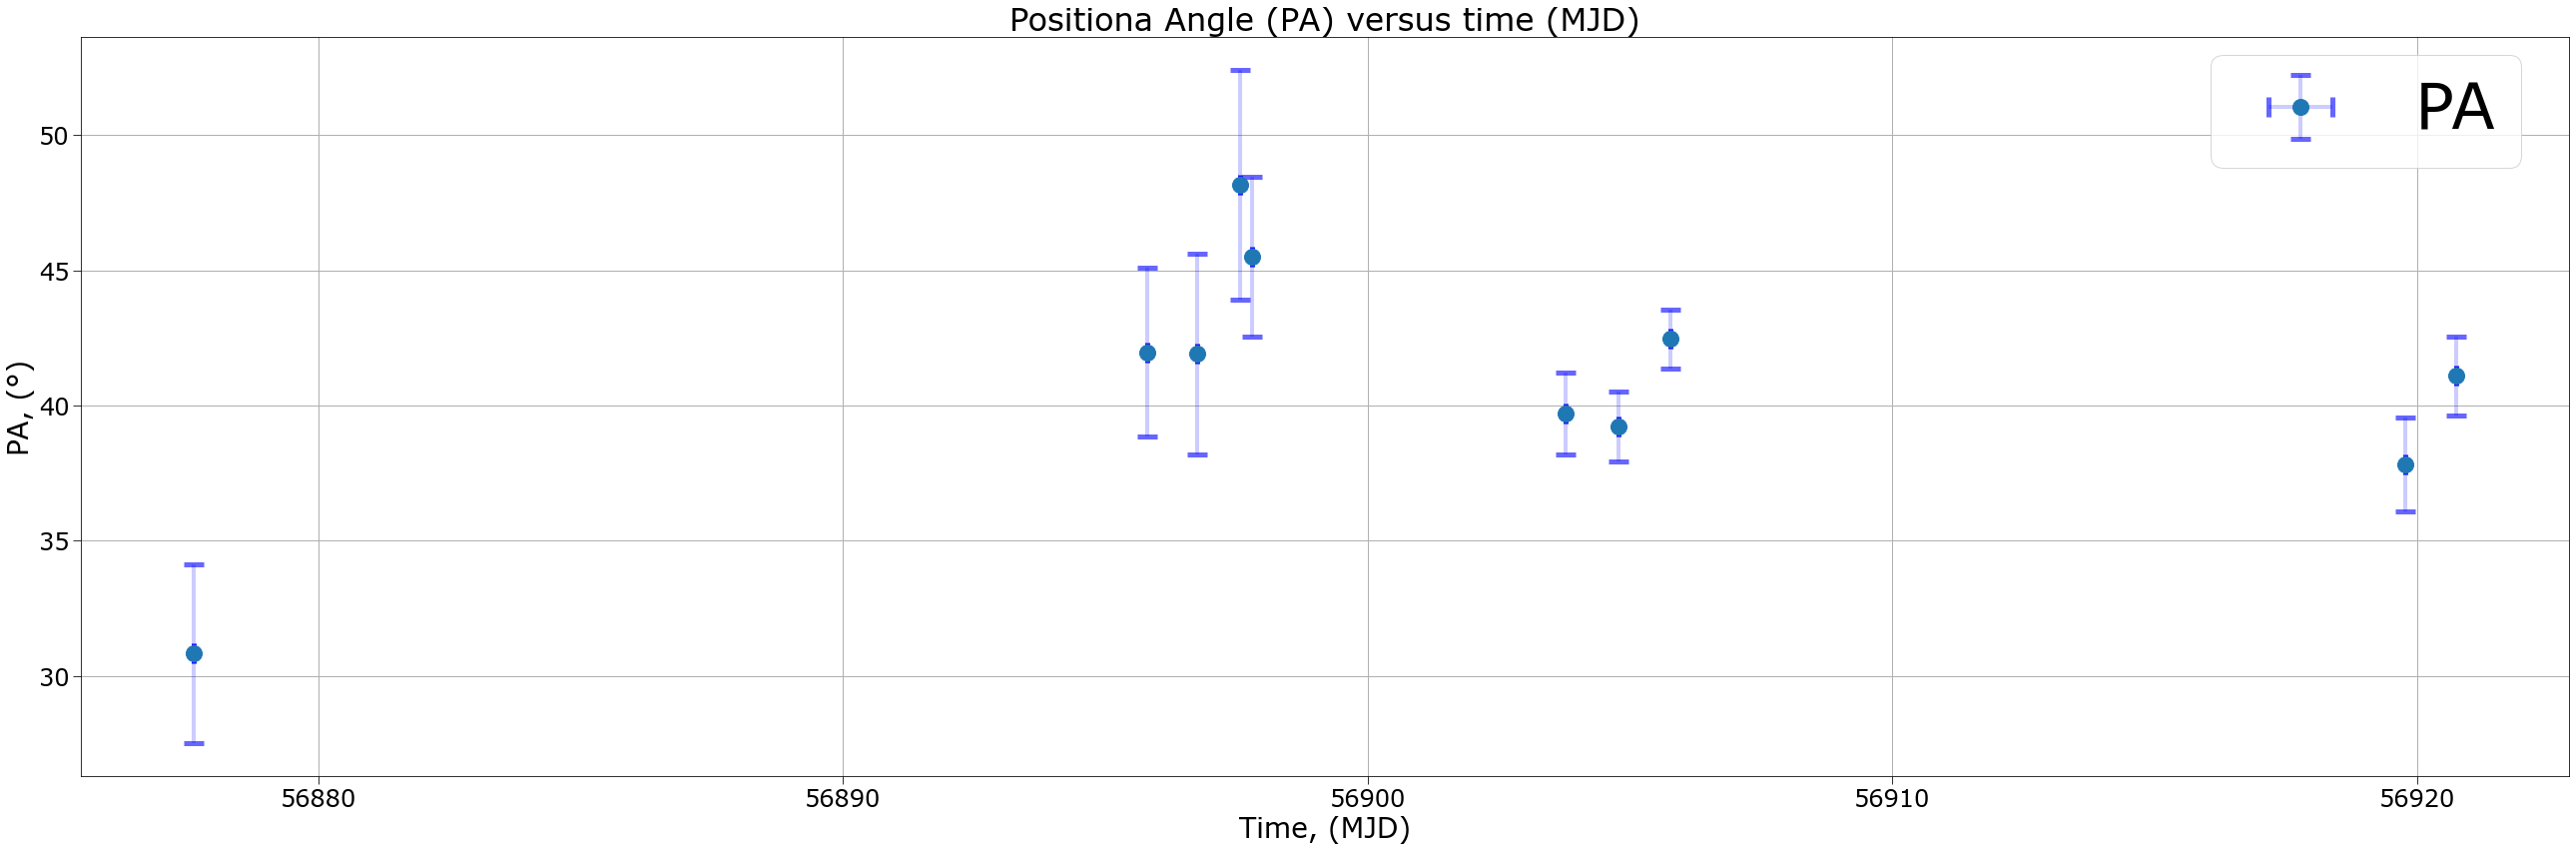

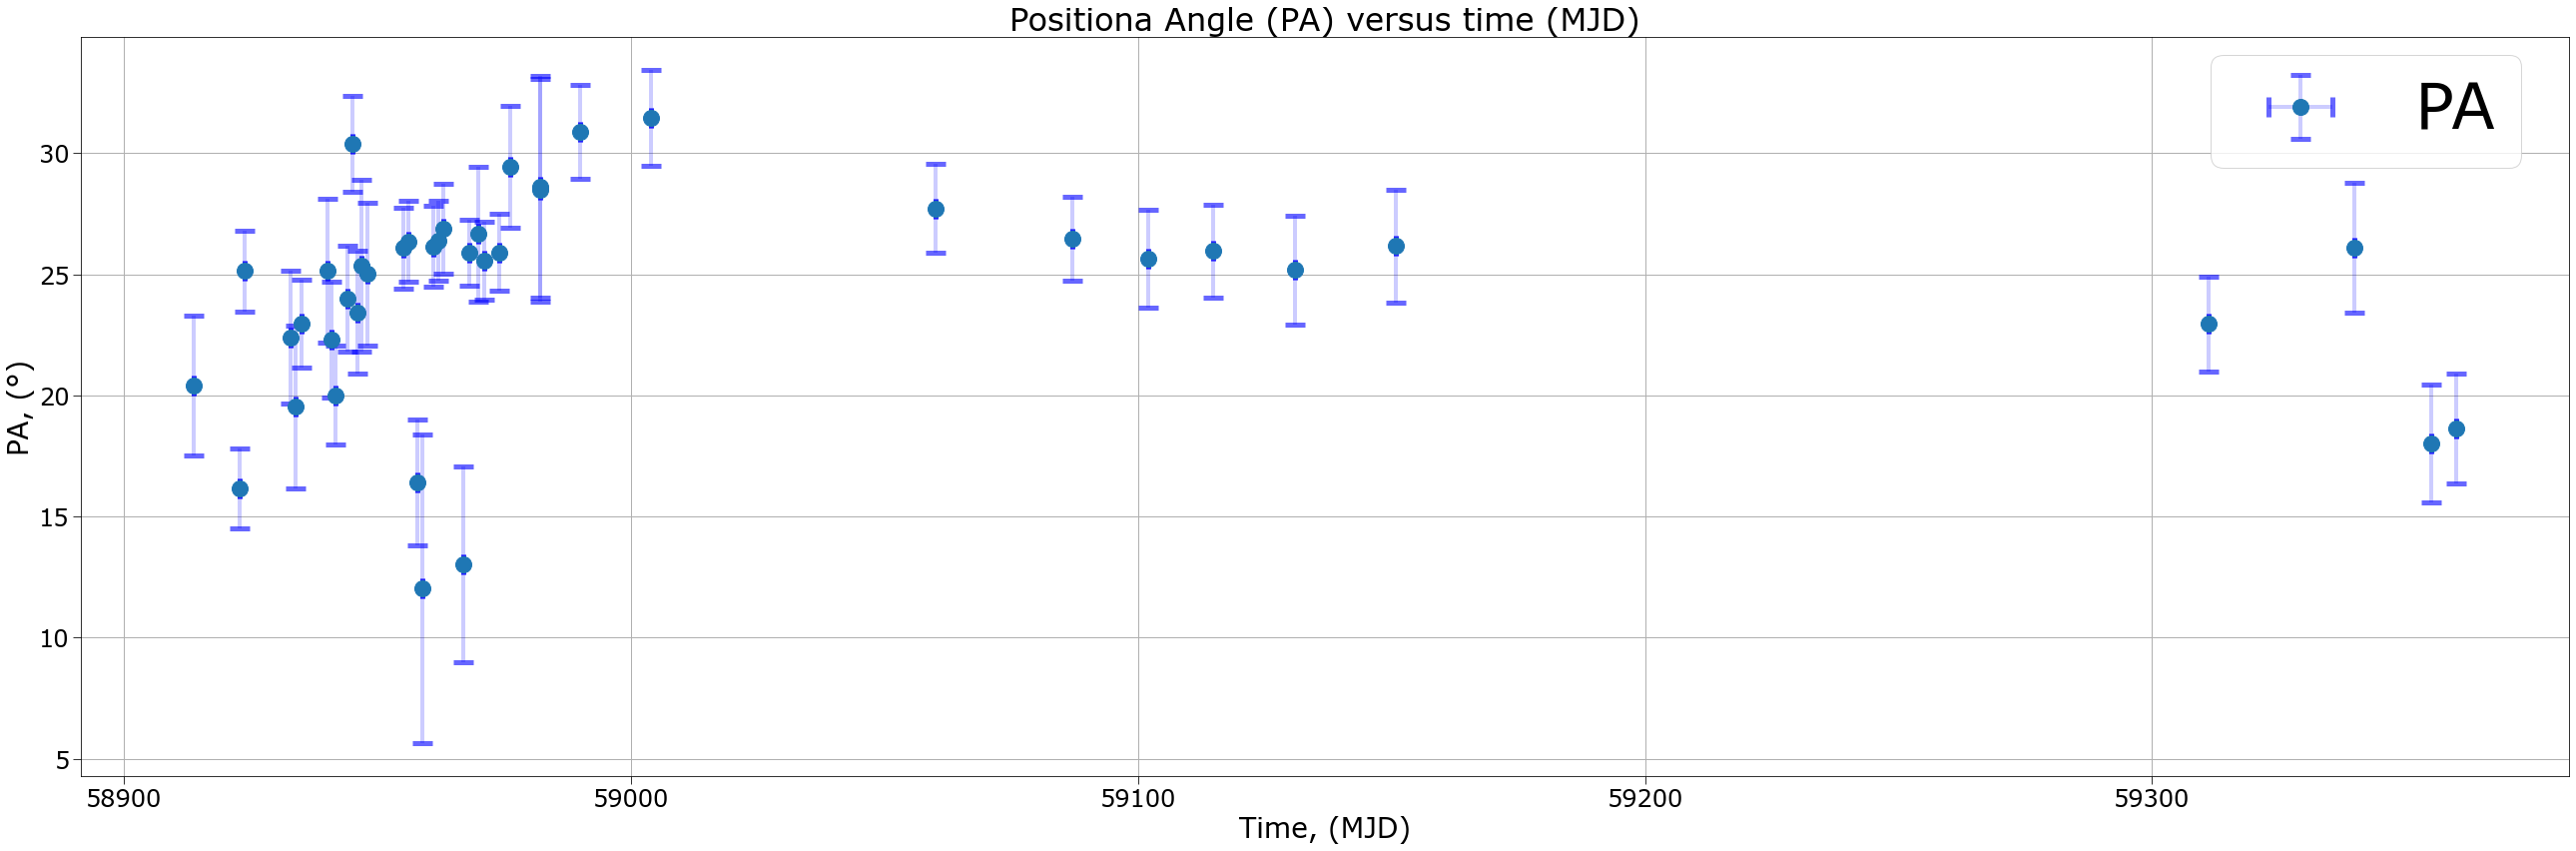

In [16]:
funcs_polarimetry.plot_pol_stab(t_MJD_track[:], PA_list[:], PA_err_list[:], False,'PA') #this is doing 
funcs_polarimetry.plot_pol_stab(t_MJD_track[:10], PA_list[:10], PA_err_list[:10], False,'PA')
funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, False,'PA')

In [17]:
###funcs_polarimetry.plot_pol_stab(EECep_PD_MJD_track, EECep_pd, EECep_pd_err, False,'PD')

#funcs_polarimetry.plot_pol_stab(t_MJD_track[:(14-3)], PA_list[:(14-3)], PA_err_list[:(14-3)], False,'PA') #this is doing 
#funcs_polarimetry.plot_pol_stab(EECep_PA_MJD_track, EECep_pa, EECep_pa_err, False,'PA')

In [18]:
#This is still kind of broken... Then fix it.
#funcs_polarimetry.EECep_light_curve_based((EECep_pd, EECep_pd_err,  tm_pd), 56877, 57000, False ,True, False, '^','PD', False,'title')

In [17]:
#Why is this?
#Load it again

all_mjd = Time(np.concatenate((t_MJD_track.mjd , EECep_PD_MJD_track.mjd)), scale='utc',format='mjd')

#master_pd
all_pd = (np.concatenate((np.array(PD_list)*100,  EECep_pd)                  )  )
all_pd_err =  (np.concatenate((np.array(PD_err_list)*100, EECep_pd_err)                  )  )

all_pa = (np.concatenate((np.array(PA_list),  EECep_pa)                  )  )
all_pa_err =  (np.concatenate((np.array(PA_err_list), EECep_pa_err)                  )  )

In [18]:
print("What is this:", len(EECep_pa), len(EECep_pa_err), len(tm_pa), len(all_mjd.mjd))

What is this: 41 41 14 55


In [56]:
#all_pd,np.array(all_mjd) 

Reading: ee_cep_2014.txt


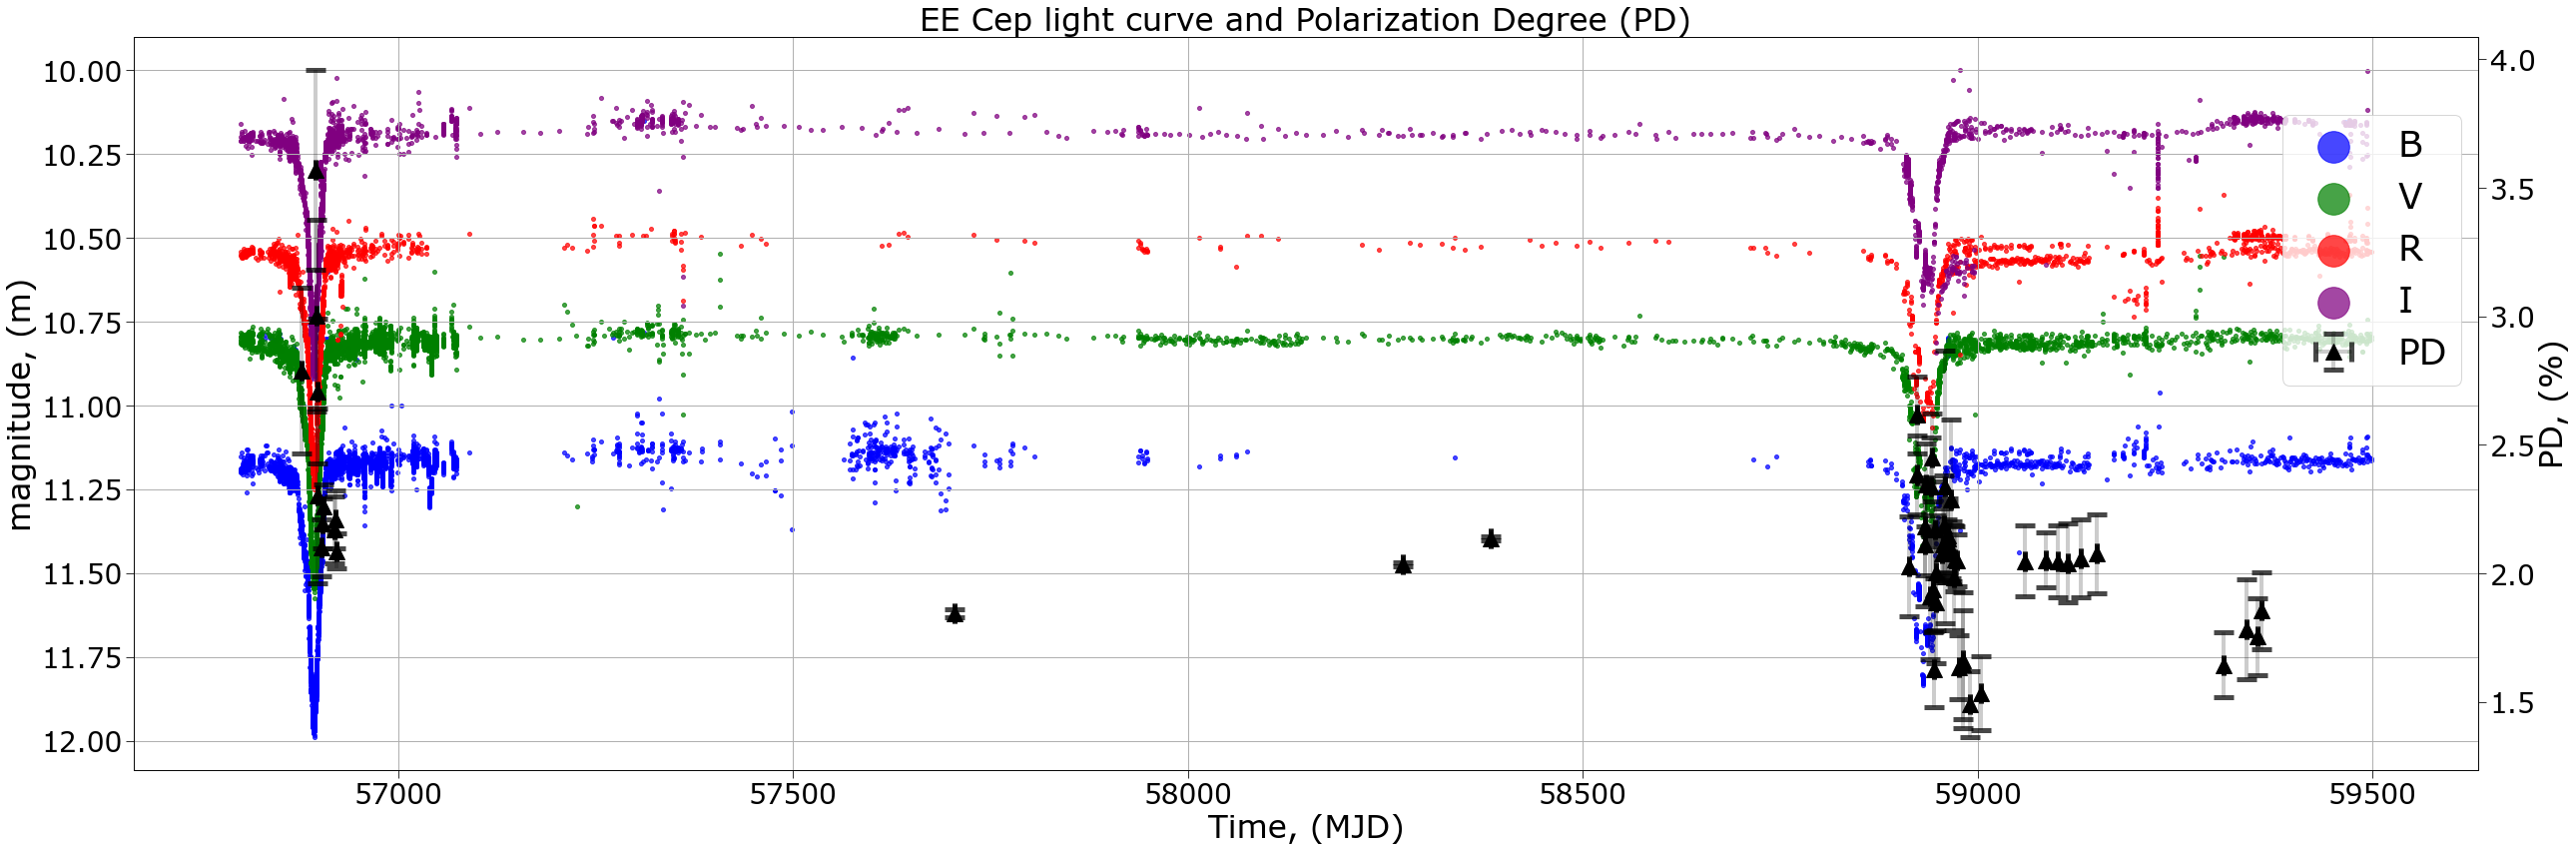

Reading: ee_cep_2014.txt


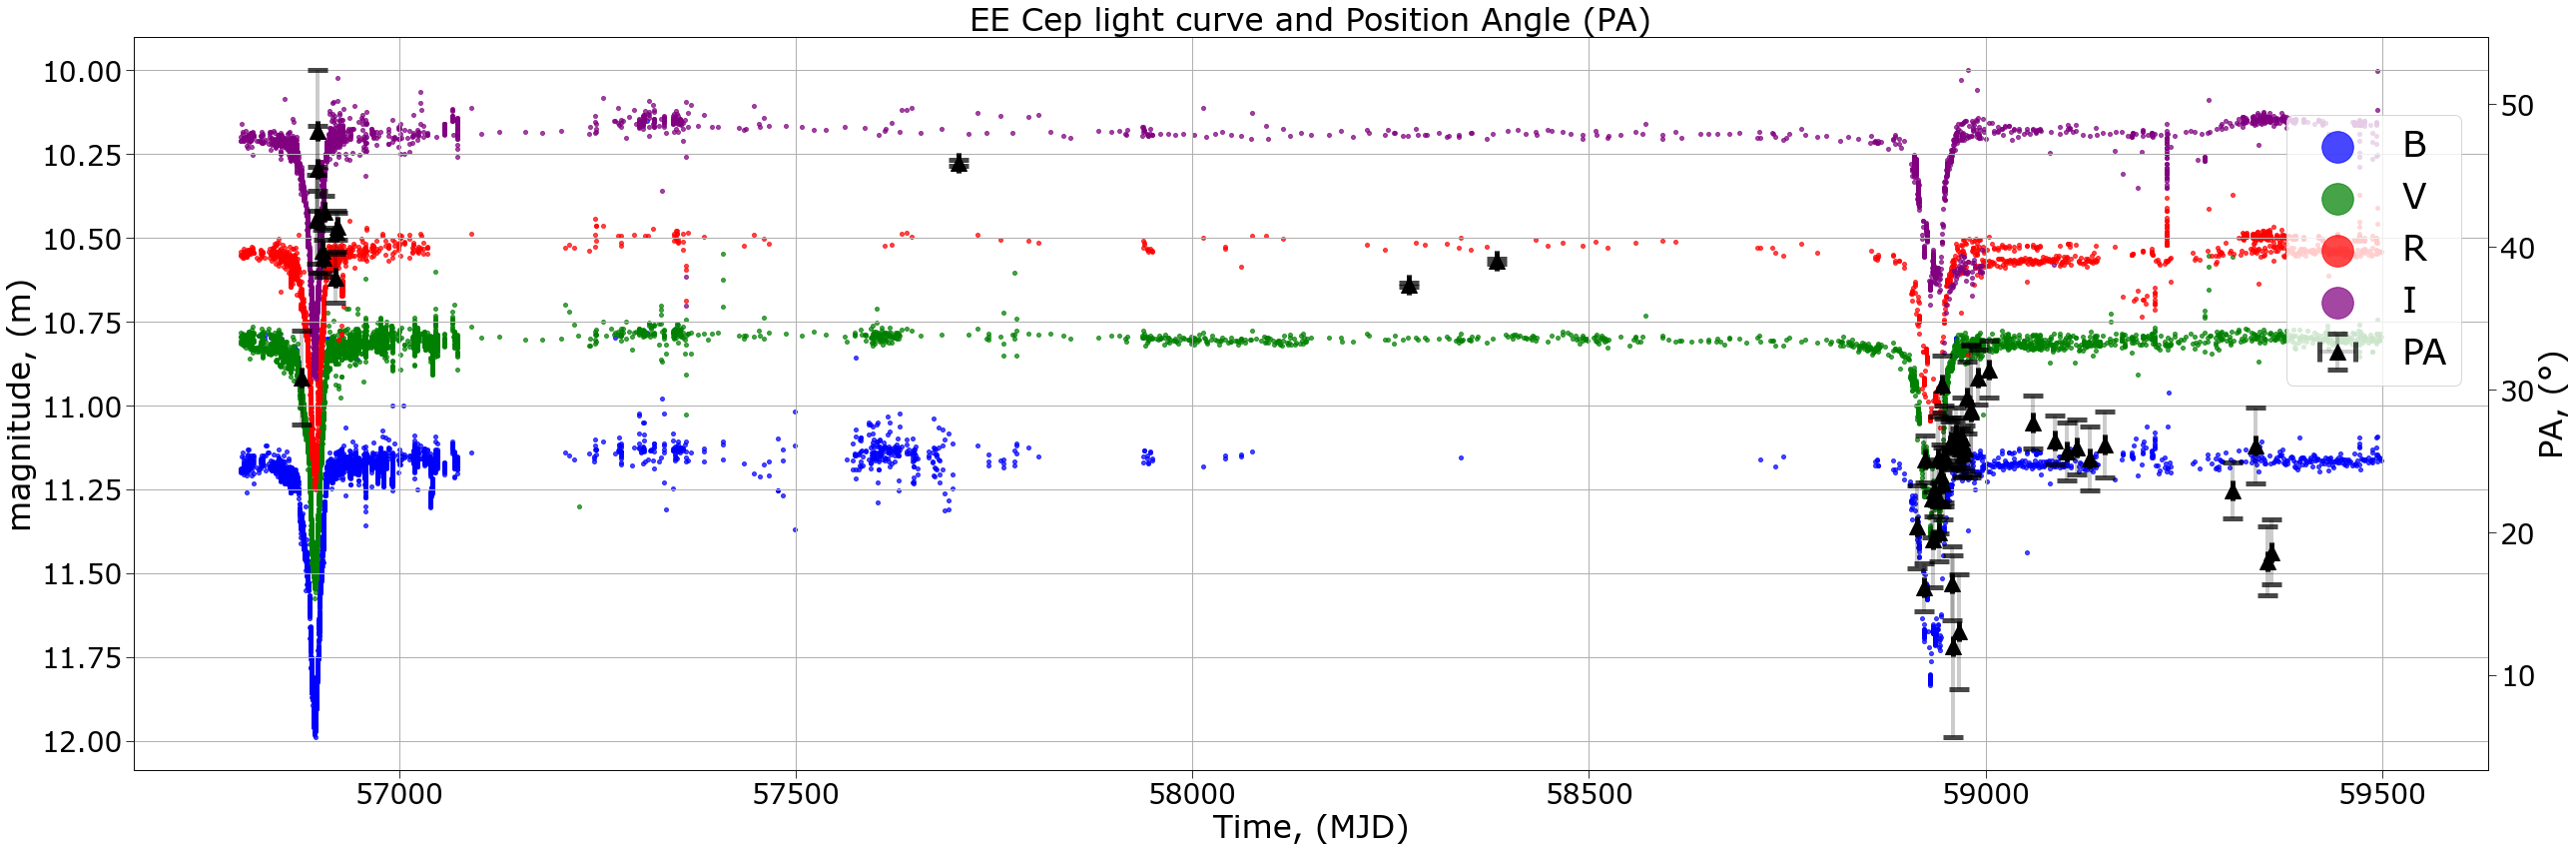

In [23]:
funcs_polarimetry.EECep_light_curve_based((all_pd , all_pd_err,  all_mjd ), 56800 , 59500, False ,True, False, '^' ,'PD', False,'title')
                  #EECep_stacked_based(target_data_PD, target_data_PA, MJD_L_cutoff , MJD_cutoff, point_MJD , lc, verb_t, mark_td, mark_t, true_pa, title_t):
funcs_polarimetry.EECep_light_curve_based((all_pa, all_pa_err,  all_mjd ), 56800 , 59500, False ,True, False, '^' ,'PA', False,'title')

#The joys of looking at light curves

In [28]:
#build a light curve. See if log scale works. consider cleaning up the data...
#split into IQUV

In [30]:
type(mjd_arr_k)

list

In [29]:
jk=0
idx = np.abs(mjd_arr_k[jk].to_value('mjd', 'float') - MJD_cutoff).argmin() #I think this is an array id
print(idx)

NameError: name 'mjd_arr_k' is not defined

In [ ]:
type(mjd_arr_k[0].to_value('mjd', 'float'))

In [39]:
t_b

<Time object: scale='utc' format='jd' value=[2456225.32742 2456241.27026 2456310.2531  ... 2459769.91894 2459769.92358
 2459769.92823]>

In [ ]:
for jk in range(0, len(mjd_arr_k)):
    #print(mjd_arr_k[jk].to_value('mjd', 'float') )
    print(np.array(mjd_arr_k[jk]))
    #print(jk,   np.abs(mjd_arr_k[jk].to_value('mjd', 'float')   - MJD_cutoff).argmin()   )
    #idx = np.abs(mjd_arr_k[jk].to_value('mjd', 'float')   - MJD_cutoff).argmin()
    #print(idx)

In [38]:
MJD_L_cutoff =  56800 
MJD_cutoff = 59500

file1 = open('./EE_Cep_light_curve/ee_cep_2014.txt', 'r')
#file1 = open('./EE_Cep_light_curve/ee_cep_small_our_obs.txt', 'r')
#Some of tthe observations are not as applicable
ee_lines = file1.readlines()

B_arr = []
V_arr = []
R_arr = []
I_arr = []

B_JD = []
V_JD = []
R_JD = []
I_JD = []

for things in ee_lines:
    if ',B,' in things:
        B_arr.append( float(things.split(",")[1]))
        B_JD.append(  float(things.split(",")[0]))
    elif ',V,' in things:
        V_arr.append( float(things.split(",")[1]))
        V_JD.append(  float(things.split(",")[0]))
    elif ',R,' in things:
        R_arr.append( float(things.split(",")[1]))
        R_JD.append(  float(things.split(",")[0]))
    elif ',I,' in things:
        I_arr.append( float(things.split(",")[1]))
        I_JD.append(  float(things.split(",")[0]))

t_b = Time(B_JD , format='jd', scale='utc')
t_v = Time(V_JD , format='jd', scale='utc')
t_r = Time(R_JD , format='jd', scale='utc')
t_i = Time(I_JD , format='jd', scale='utc')

B_arr = []
V_arr = []
R_arr = []
I_arr = []

B_JD = []
V_JD = []
R_JD = []
I_JD = []

for things in ee_lines:
    if ',B,' in things:
        B_arr.append( float(things.split(",")[1]))
        B_JD.append(  float(things.split(",")[0]))
    elif ',V,' in things:
        V_arr.append( float(things.split(",")[1]))
        V_JD.append(  float(things.split(",")[0]))
    elif ',R,' in things:
        R_arr.append( float(things.split(",")[1]))
        R_JD.append(  float(things.split(",")[0]))
    elif ',I,' in things:
        I_arr.append( float(things.split(",")[1]))
        I_JD.append(  float(things.split(",")[0]))

t_b = Time(B_JD , format='jd', scale='utc')
t_v = Time(V_JD , format='jd', scale='utc')
t_r = Time(R_JD , format='jd', scale='utc')
t_i = Time(I_JD , format='jd', scale='utc')

color_arr = [B_arr, V_arr, R_arr, I_arr]
mjd_arr_k = [t_b, t_v, t_r, t_i, target_data[2]]
    
#originals
c_arr = ['blue',  'green',  'red', 'purple']
c_labs = ['B', 'V', 'R', 'I', 'pol_d']
    
#c_labs = ['I', 'R', 'V', 'B', 'pol_d']    
index_cutt = []
index_L_cutt = []

#This thing finds cutoffs to the light curves
#For some reason it is not working
for jk in range(0, len(mjd_arr_k)):
    idx = np.abs(mjd_arr_k[jk].to_value('mjd', 'float')   - MJD_cutoff).argmin()
    idxL = np.abs(mjd_arr_k[jk].to_value('mjd', 'float')   - MJD_L_cutoff).argmin()
    index_cutt.append(int(idx))
    index_L_cutt.append(int(idxL))  

#How to filter out
#Try 3 sigma bro
#What you really need is to fit the curve. and remove outliers from there.

for k in range(0 , len(c_labs)-1):
    mean_light = np.mean(color_arr[k][:])
    median_light = np.median(color_arr[k][:])
    std_light = np.std(color_arr[k][:])
    print(c_labs[k]+' curve')
    print(mean_light,u"\u00B1", std_light)
    print(median_light,u"\u00B1", std_light)

    fig, axs = plt.subplots(1, 1)
    axs.scatter(mjd_arr_k[k].mjd,  color_arr[k][:], alpha = 0.72, s=16, color=c_arr[k], label=c_labs[k])

    axs.invert_yaxis()
    axs.grid()
    axs.tick_params(axis="x", labelsize=24)
    axs.tick_params(axis="y", labelsize=24)
    axs.legend([c_labs[k]], fontsize=32)
        
    plt.plot()

AttributeError: 'dict' object has no attribute 'to_value'

In [37]:
for things in (mjd_arr_k[0]):
    print(things)

2456225.32742
2456241.27026
2456310.2531
2456320.48723
2456457.78598
2456542.39606
2456546.86918
2456549.38686
2456583.49582
2456584.33055
2456591.29037
2456600.54005
2456624.53413
2456630.4694
2456635.46392
2456652.47567
2456670.51844
2456739.73056
2456741.73403
2456755.69688
2456761.98374
2456761.98374
2456761.98587
2456761.98587
2456761.98801
2456761.98801
2456762.69694
2456763.98428
2456763.98428
2456763.98642
2456763.98642
2456763.98853
2456767.98203
2456767.98203
2456767.98416
2456767.98416
2456767.98625
2456767.98625
2456768.97509
2456768.97509
2456768.9772
2456768.9772
2456768.97931
2456768.97931
2456771.70868
2456771.98047
2456771.98047
2456771.98256
2456771.98256
2456771.9847
2456771.9847
2456773.68891
2456776.71094
2456776.98968
2456776.99178
2456776.9939
2456777.9653
2456777.96744
2456778.70646
2456778.96275
2456778.96275
2456778.96483
2456778.96483
2456778.96692
2456778.96692
2456779.98443
2456781.97411
2456781.97411
2456781.97619
2456781.97619
2456781.97828
2456781.97828


2456869.64735
2456869.64925
2456869.65113
2456869.65304
2456869.65494
2456869.65682
2456869.65717
2456869.65873
2456869.66063
2456869.66251
2456869.66441
2456869.6663
2456869.66821
2456869.67012
2456869.67201
2456869.67391
2456869.67528
2456869.6758
2456869.67655
2456869.67771
2456869.84482
2456869.94603
2456869.976377
2456870.40208
2456870.471007
2456870.54913
2456870.552
2456870.55487
2456870.55773
2456870.5606
2456870.56346
2456870.56633
2456870.5692
2456870.57207
2456870.57497
2456870.57782
2456870.57918
2456870.58069
2456870.58355
2456870.58642
2456870.58929
2456870.59275
2456870.59541
2456870.59802
2456870.60065
2456870.60328
2456870.60591
2456870.60854
2456870.6112
2456870.61384
2456870.61647
2456870.6191
2456870.62174
2456870.624363
2456870.627002
2456870.62962
2456870.63225
2456870.63488
2456870.6375
2456870.64015
2456870.64278
2456870.64539
2456870.64802
2456870.65065
2456870.65329
2456870.65572
2456870.65594
2456870.65859
2456870.66124
2456870.6639
2456870.66654
2456870.6691

2456884.60649
2456884.60792
2456884.63792
2456884.7558
2456884.913461
2456884.91515
2456885.34762
2456885.39163
2456885.47265
2456885.56395
2456885.56451
2456885.56506
2456885.60532
2456885.60532
2456885.60818
2456885.60818
2456885.61105
2456885.61105
2456885.61391
2456885.61391
2456885.61677
2456885.61677
2456885.61964
2456885.61964
2456885.62251
2456885.62251
2456885.62537
2456885.62537
2456885.62824
2456885.62824
2456885.63111
2456885.63111
2456885.63397
2456885.63397
2456885.63684
2456885.63684
2456885.63971
2456885.63971
2456885.64258
2456885.64258
2456885.64544
2456885.64544
2456885.64831
2456885.64831
2456885.65117
2456885.65117
2456885.65325
2456885.65404
2456885.65404
2456885.65691
2456885.65691
2456885.65977
2456885.65977
2456885.66378
2456885.66378
2456885.66534
2456885.66664
2456885.66664
2456885.66951
2456885.66951
2456885.67237
2456885.67237
2456885.67524
2456885.67524
2456885.6781
2456885.6781
2456885.71458
2456886.455428
2456886.5726
2456886.5865
2456886.5951
2456886.60

2456888.86779
2456888.86953
2456888.86987
2456888.87127
2456888.873
2456888.87473
2456888.87648
2456888.87822
2456888.87995
2456888.88169
2456889.36919
2456889.39324
2456889.39481
2456889.40458
2456889.40984
2456889.50957
2456889.51082
2456889.52552
2456889.53303
2456889.54087
2456889.54264
2456889.5444
2456889.54618
2456889.54794
2456889.54864
2456889.54917
2456889.5497
2456889.54972
2456889.55023
2456889.55077
2456889.5513
2456889.55149
2456889.55325
2456889.55505
2456889.55682
2456889.55858
2456889.56035
2456889.56211
2456889.56388
2456889.56564
2456889.56741
2456889.56781
2456889.56834
2456889.56887
2456889.56918
2456889.56941
2456889.56994
2456889.57047
2456889.57094
2456889.57101
2456889.57154
2456889.57208
2456889.57261
2456889.57263
2456889.57271
2456889.57314
2456889.57367
2456889.57421
2456889.57448
2456889.57474
2456889.57527
2456889.57581
2456889.57624
2456889.578
2456889.57976
2456889.58114
2456889.58154
2456889.58167
2456889.5822
2456889.58274
2456889.58331
2456889.58508


2456893.55971
2456893.56127
2456893.56309
2456893.56492
2456893.56672
2456893.56854
2456893.57036
2456893.57219
2456893.57399
2456893.57581
2456893.57764
2456893.57946
2456893.58127
2456893.58309
2456893.5849
2456893.5867
2456893.58851
2456893.59032
2456893.59213
2456893.59394
2456893.59575
2456893.596429
2456893.596939
2456893.597448
2456893.59756
2456893.59938
2456893.60119
2456893.60123
2456893.603
2456893.60481
2456893.60662
2456893.60843
2456893.61023
2456893.61186
2456893.61205
2456893.61385
2456893.61566
2456893.61747
2456893.61928
2456893.62109
2456893.62291
2456893.62304
2456893.62471
2456893.62653
2456893.62834
2456893.63015
2456893.63196
2456893.63376
2456893.63529
2456893.63557
2456893.637292
2456893.63737
2456893.63918
2456893.64098
2456893.6428
2456893.64461
2456893.64641
2456893.64822
2456893.649196
2456893.65002
2456893.65183
2456893.65363
2456893.65545
2456893.65725
2456893.65905
2456893.66086
2456893.66266
2456893.66447
2456893.66627
2456893.66695
2456893.66808
245689

2456895.61635
2456895.61816
2456895.61999
2456895.62023
2456895.62179
2456895.6236
2456895.62542
2456895.62723
2456895.62905
2456895.63087
2456895.63267
2456895.63448
2456895.6363
2456895.63773
2456895.63811
2456895.63993
2456895.64175
2456895.64356
2456895.64538
2456895.6472
2456895.64822
2456895.64902
2456895.65083
2456895.65265
2456895.65446
2456895.65627
2456895.65809
2456895.65991
2456895.66172
2456895.66353
2456895.66535
2456895.66716
2456895.66898
2456895.67079
2456895.6726
2456895.67442
2456895.67624
2456895.67804
2456895.67986
2456895.68167
2456895.68348
2456895.68529
2456895.68711
2456895.68891
2456895.69072
2456895.69253
2456895.69434
2456895.69615
2456895.7037
2456895.70551
2456895.7073
2456895.70911
2456895.71091
2456895.71271
2456895.71453
2456895.71632
2456895.71813
2456895.71993
2456895.72174
2456895.72353
2456895.72535
2456895.72714
2456895.72895
2456895.73076
2456895.73257
2456895.73438
2456895.73618
2456895.73799
2456895.73979
2456895.7416
2456895.7434
2456895.74523


2456899.912
2456899.91343
2456899.91501
2456899.91645
2456899.91803
2456899.91946
2456899.92098
2456899.92251
2456899.92395
2456900.42537
2456900.44251
2456900.44635
2456900.45027
2456900.45404
2456900.45795
2456900.46179
2456900.52962
2456900.53144
2456900.53325
2456900.53509
2456900.53692
2456900.53876
2456900.54058
2456900.54242
2456900.54424
2456900.54605
2456900.54786
2456900.54966
2456900.55148
2456900.55331
2456900.55513
2456900.55694
2456900.5588
2456900.5606
2456900.56242
2456900.56424
2456900.56606
2456900.56625
2456900.56788
2456900.56972
2456900.57005
2456900.57155
2456900.57337
2456900.57394
2456900.5752
2456900.577
2456900.5778
2456900.57883
2456900.58066
2456900.58249
2456900.58432
2456900.58613
2456900.58796
2456900.58979
2456900.59161
2456900.59343
2456900.59523
2456900.59706
2456900.59887
2456900.60067
2456900.60251
2456900.60278
2456900.60434
2456900.60613
2456900.60797
2456900.60979
2456900.61163
2456900.61345
2456900.61524
2456900.61707
2456900.6189
2456900.62072
2

2456905.62241
2456905.62251
2456905.62295
2456905.62348
2456905.62478
2456905.626071
2456905.62707
2456905.62935
2456905.63163
2456905.6339
2456905.63562
2456905.63614
2456905.63618
2456905.63668
2456905.63721
2456905.63775
2456905.63828
2456905.63848
2456905.63882
2456905.63935
2456905.63988
2456905.64042
2456905.64076
2456905.64095
2456905.64148
2456905.64201
2456905.64255
2456905.64306
2456905.64308
2456905.64361
2456905.64414
2456905.64467
2456905.64521
2456905.64535
2456905.64574
2456905.64628
2456905.64734
2456905.64763
2456905.64788
2456905.64841
2456905.64894
2456905.64947
2456905.64992
2456905.65001
2456905.65054
2456905.65107
2456905.65161
2456905.65214
2456905.65221
2456905.65267
2456905.65321
2456905.65374
2456905.65428
2456905.65451
2456905.6548
2456905.65534
2456905.65587
2456905.65641
2456905.65679
2456905.65694
2456905.65747
2456905.658
2456905.65853
2456905.65907
2456905.659074
2456905.6596
2456905.66014
2456905.66067
2456905.6612
2456905.66173
2456905.66227
2456905.66

2456920.52115
2456920.52344
2456920.52573
2456920.52586
2456920.52801
2456920.53029
2456920.53163
2456920.53258
2456920.53487
2456920.53538
2456920.53715
2456920.53904
2456920.53943
2456920.54172
2456920.54249
2456920.54402
2456920.54626
2456920.54631
2456920.54859
2456920.54968
2456920.55088
2456920.55317
2456920.55337
2456920.55544
2456920.55772
2456920.55999
2456920.56227
2456920.56456
2456920.56685
2456920.56913
2456920.57142
2456920.57369
2456920.57598
2456920.57825
2456920.58054
2456920.58284
2456920.58513
2456920.58741
2456920.58969
2456920.59196
2456920.59425
2456920.59654
2456920.59881
2456920.59919
2456920.6011
2456920.60339
2456920.65754
2456920.91392
2456920.91737
2456920.92061
2456921.24405
2456921.24772
2456921.25147
2456921.25501
2456921.25878
2456921.45921
2456921.46284
2456921.46654
2456921.4701
2456921.47382
2456921.65802
2456921.74561
2456922.33879
2456922.5672
2456922.63095
2456922.83009
2456922.83336
2456922.83662
2456923.33677
2456923.530839
2456923.531892
2456923

2456939.61179
2456939.61271
2456939.61365
2456939.61459
2456939.61552
2456939.61644
2456939.61737
2456939.6183
2456939.61922
2456939.62016
2456939.62109
2456939.62202
2456939.62296
2456939.62389
2456939.62483
2456939.62576
2456939.62668
2456939.62761
2456939.62855
2456939.62948
2456939.63041
2456939.63135
2456939.63227
2456939.63321
2456939.63415
2456939.63508
2456939.636
2456939.63694
2456939.63788
2456939.6388
2456939.63973
2456939.64067
2456939.64159
2456939.64253
2456939.64345
2456939.64439
2456939.64533
2456939.64626
2456939.64718
2456939.64812
2456939.649045
2456940.6038
2456941.80235
2456941.80561
2456943.46086
2456943.46209
2456943.46332
2456943.46455
2456943.46578
2456943.46701
2456943.46822
2456943.46945
2456943.47068
2456943.4719
2456943.47314
2456943.47437
2456943.47561
2456943.47681
2456943.47804
2456943.47928
2456943.4805
2456943.48173
2456943.48295
2456943.48417
2456943.48541
2456943.48664
2456943.48786
2456943.4891
2456943.49033
2456943.49155
2456943.49277
2456943.49401

2456956.56043
2456956.56173
2456957.49468
2456957.49554
2456957.49634
2456957.49726
2456957.49913
2456957.50006
2456957.50099
2456957.50193
2456957.50285
2456957.50379
2456957.50472
2456957.50565
2456957.50658
2456957.50751
2456957.50844
2456957.50937
2456957.5103
2456957.51123
2456957.51217
2456957.5131
2456957.51402
2456957.51495
2456957.51589
2456957.51681
2456957.51774
2456957.51867
2456957.5196
2456957.52054
2456957.52146
2456957.52239
2456957.52333
2456957.52427
2456957.52519
2456957.52612
2456957.52705
2456957.52798
2456957.52892
2456957.52984
2456957.53078
2456957.53171
2456957.53264
2456957.53357
2456957.53451
2456957.53545
2456957.53637
2456957.5373
2456957.53823
2456957.53916
2456957.54009
2456957.54101
2456957.54194
2456957.54288
2456957.5438
2456957.54474
2456957.54567
2456957.54659
2456957.54753
2456957.54845
2456957.54938
2456957.55032
2456957.55124
2456957.55218
2456957.55311
2456957.55405
2456957.55497
2456957.55591
2456957.55683
2456957.55777
2456957.5587
2456957.5596

2456973.52888
2456973.53027
2456973.53166
2456973.53307
2456973.53447
2456973.53587
2456973.53725
2456973.53866
2456973.54006
2456973.54146
2456973.54286
2456973.54425
2456973.54564
2456973.54705
2456973.54845
2456973.54986
2456973.55123
2456973.55262
2456973.55403
2456973.55543
2456973.55683
2456973.55821
2456973.55961
2456973.56101
2456973.56241
2456973.56381
2456973.5652
2456973.56659
2456973.568
2456973.5694
2456973.5708
2456973.57219
2456973.57359
2456973.57499
2456973.57639
2456973.58178
2456973.58318
2456973.58458
2456973.58598
2456973.58738
2456973.58876
2456973.59016
2456973.59156
2456973.59296
2456973.59436
2456973.59575
2456973.59714
2456973.59854
2456973.59994
2456973.60134
2456973.60273
2456973.60411
2456973.60552
2456973.60692
2456973.60832
2456973.6097
2456973.61109
2456973.61249
2456973.61389
2456973.61531
2456973.61668
2456973.61808
2456973.61948
2456973.62089
2456973.62229
2456973.62367
2456973.62508
2456973.626476
2456973.627876
2456974.58934
2456976.47446
2456976.47

2456977.63257
2456977.63348
2456977.63363
2456977.63469
2456977.63507
2456977.63575
2456977.63664
2456977.63681
2456977.63786
2456977.63891
2456977.63968
2456977.63995
2456977.64101
2456977.64126
2456977.64207
2456977.64284
2456977.64312
2456977.64418
2456977.64442
2456977.64523
2456977.64601
2456977.64627
2456977.64733
2456977.64759
2456977.64837
2456977.64918
2456977.64941
2456977.65045
2456977.65076
2456977.6515
2456977.65235
2456977.65255
2456977.65361
2456977.65392
2456977.65465
2456977.65552
2456977.65569
2456977.65674
2456977.65711
2456977.65779
2456977.65869
2456977.65883
2456977.65987
2456977.66028
2456977.66091
2456977.66186
2456977.66197
2456977.66303
2456977.66345
2456977.66409
2456977.66503
2456977.66515
2456977.6662
2456977.66662
2456977.66727
2456977.66819
2456977.6683
2456977.66935
2456977.66978
2456977.67039
2456977.67137
2456977.67145
2456977.67249
2456977.67295
2456977.67353
2456977.67453
2456977.67458
2456977.67565
2456977.67611
2456977.6767
2456977.6777
2456977.677

2456982.58686
2456982.58799
2456982.5891
2456982.59021
2456982.59132
2456982.59244
2456982.59355
2456982.59466
2456982.59579
2456982.5969
2456982.59801
2456982.59912
2456982.60024
2456982.60135
2456982.60247
2456982.60359
2456982.6047
2456982.60581
2456982.60692
2456982.60804
2456982.60916
2456982.61027
2456982.61139
2456982.6125
2456982.61361
2456982.61472
2456982.61584
2456982.61696
2456982.61808
2456982.61919
2456982.6203
2456982.62141
2456982.62252
2456982.62365
2456982.62476
2456982.62588
2456982.62699
2456982.6281
2456982.62922
2456982.63034
2456982.63145
2456982.63256
2456982.63368
2456982.63479
2456982.6359
2456982.63703
2456982.63814
2456982.63926
2456982.64037
2456982.64148
2456982.64424
2456982.64535
2456982.64646
2456982.64758
2456982.64869
2456982.6498
2456982.65093
2456982.65204
2456982.65316
2456982.65427
2456982.65538
2456982.6565
2456982.65762
2456982.65874
2456982.65985
2456982.66096
2456982.66208
2456982.66319
2456982.66431
2456982.66543
2456982.66654
2456982.66765
2

2457039.611
2457039.612
2457039.613
2457039.614
2457039.614
2457039.615
2457039.616
2457039.617
2457039.618
2457039.619
2457039.62
2457039.621
2457039.622
2457039.623
2457039.624
2457039.625
2457039.626
2457039.627
2457039.627
2457039.628
2457039.629
2457039.63
2457039.631
2457039.632
2457039.633
2457039.634
2457039.635
2457039.636
2457040.48896
2457040.4899
2457040.49084
2457040.49177
2457040.49269
2457040.49362
2457040.49455
2457040.49549
2457040.49642
2457040.49734
2457040.49828
2457040.49921
2457040.50014
2457040.50107
2457040.502
2457040.50293
2457040.50386
2457040.50479
2457040.50572
2457040.50665
2457040.50759
2457040.50851
2457040.50945
2457040.51038
2457040.51131
2457040.51224
2457040.51317
2457040.5141
2457040.51503
2457040.51597
2457040.51689
2457040.51782
2457040.51876
2457040.51969
2457040.52062
2457040.52156
2457040.52248
2457040.52342
2457040.52435
2457040.52527
2457040.52621
2457040.52715
2457040.52807
2457040.52901
2457040.52994
2457040.53087
2457040.53181
2457040.5327

2457651.74972
2457651.75639
2457654.5725
2457654.57618
2457654.57994
2457667.70891
2457667.71521
2457667.7215
2457672.55535
2457672.55902
2457672.56272
2457674.51244
2457674.51623
2457674.52006
2457675.65666
2457675.66037
2457675.66406
2457676.5399
2457676.54363
2457676.54742
2457677.53766
2457677.54177
2457677.54591
2457680.5928
2457680.59715
2457680.60116
2457681.55539
2457681.55958
2457681.56374
2457685.5153
2457685.51975
2457685.52381
2457687.54192
2457687.54576
2457687.54997
2457693.54446
2457693.54851
2457693.55265
2457697.66142
2457697.66628
2457697.67051
2457729.19352
2457743.62421
2457743.62816
2457743.63188
2457758.18265
2457762.58799
2457762.59198
2457762.59579
2457776.5836
2457776.58742
2457776.59123
2457778.59119
2457778.59524
2457778.59898
2457793.24042
2457806.22024
2457938.41269
2457938.41288
2457940.39534
2457940.39553
2457943.41175
2457943.41193
2457945.397
2457945.3972
2457947.40963
2457947.40983
2457949.39775
2457949.39795
2458014.38434
2458041.45054
2458041.45288
2

2459405.468588
2459408.485984
2459409.466563
2459410.467975
2459411.465012
2459412.456806
2459413.460185
2459414.474005
2459415.453414
2459416.452639
2459417.45206
2459418.451759
2459419.451389
2459420.450637
2459421.451505
2459423.448796
2459424.472789
2459425.469363
2459427.468125
2459428.464653
2459429.462488
2459431.465891
2459432.461273
2459432.90714
2459433.462546
2459434.45838
2459435.460891
2459436.457616
2459437.458588
2459438.463067
2459439.45537
2459441.489028
2459442.469931
2459443.451609
2459444.45
2459445.451354
2459446.447188
2459447.446771
2459448.427743
2459449.426782
2459450.422951
2459451.36111
2459451.466644
2459452.420868
2459453.438021
2459454.436678
2459455.43588
2459456.432037
2459457.430394
2459458.432211
2459460.447095
2459462.426563
2459465.424109
2459465.563
2459465.5697
2459465.5775
2459466.423021
2459467.421111
2459469.411921
2459470.96671
2459470.97027
2459470.97381
2459471.96174
2459471.96529
2459471.96883
2459473.446076
2459474.406169
2459475.407639
245

In [34]:
#My suppose is that this:
print(mjd_arr_k) #That is true

#Is not an astropy object

[<Time object: scale='utc' format='jd' value=[2456225.32742 2456241.27026 2456310.2531  ... 2459769.91894 2459769.92358
 2459769.92823]>, <Time object: scale='utc' format='jd' value=[2456225.32696 2456241.26972 2456310.25265 ... 2459769.92009 2459769.92475
 2459769.92939]>, <Time object: scale='utc' format='jd' value=[2456225.32597 2456241.27003 2456310.25288 ... 2459769.92116 2459769.9258
 2459769.93044]>, <Time object: scale='utc' format='jd' value=[2456225.32764 2456241.27054 2456310.25333 ... 2459769.92225 2459769.92689
 2459769.93154]>, {'2020-03-15_EE Cep': (['q', 0.016724441264917143, 0.019660275136800506, 0.020793886327648912, 0.01973559805829959, 0.019243845746150432, 0.019300508445275286, 0.017283036879735526, 0.01714081101494305, 0.01927500238233264, 0.018217141967442157, 0.014979700753217936, 0.01726438598142467, 0.018689768332940726, 0.018438909683135347, 0.016384126955772155, 0.015872875817682257, 0.01584690235439868, 0.01893482714962079, 0.019078998737671066, 0.018555762

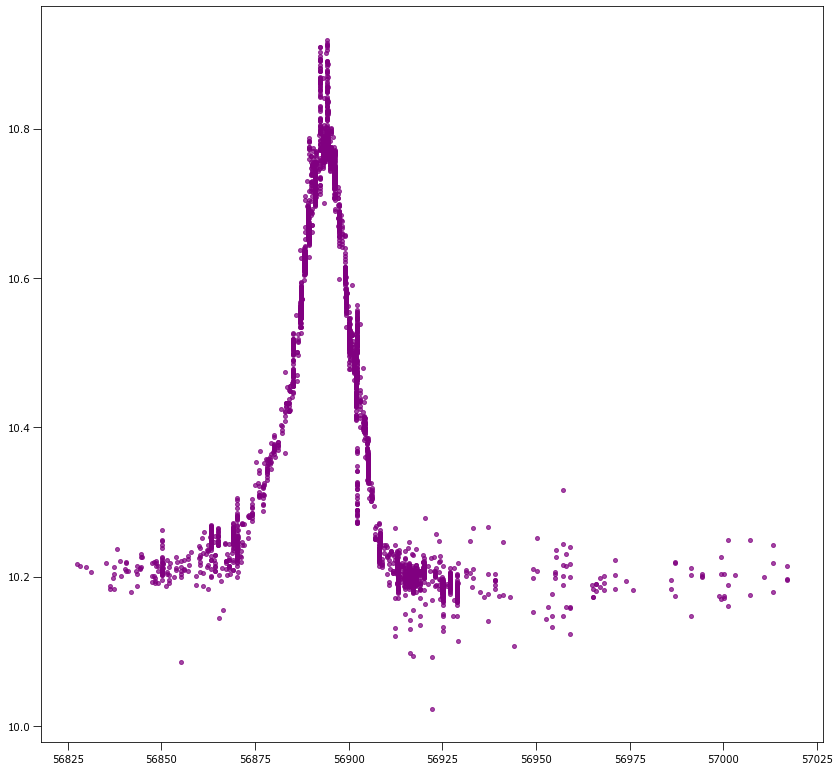

In [98]:

z = np.polyfit(mjd_arr_k[k].mjd[100:4000], color_arr[k][100:4000], 2)
plt.scatter(mjd_arr_k[k].mjd[100:4000],  color_arr[k][100:4000],alpha = 0.72, s=16, color=c_arr[k], label=c_labs[k])
#plt.plot(z)

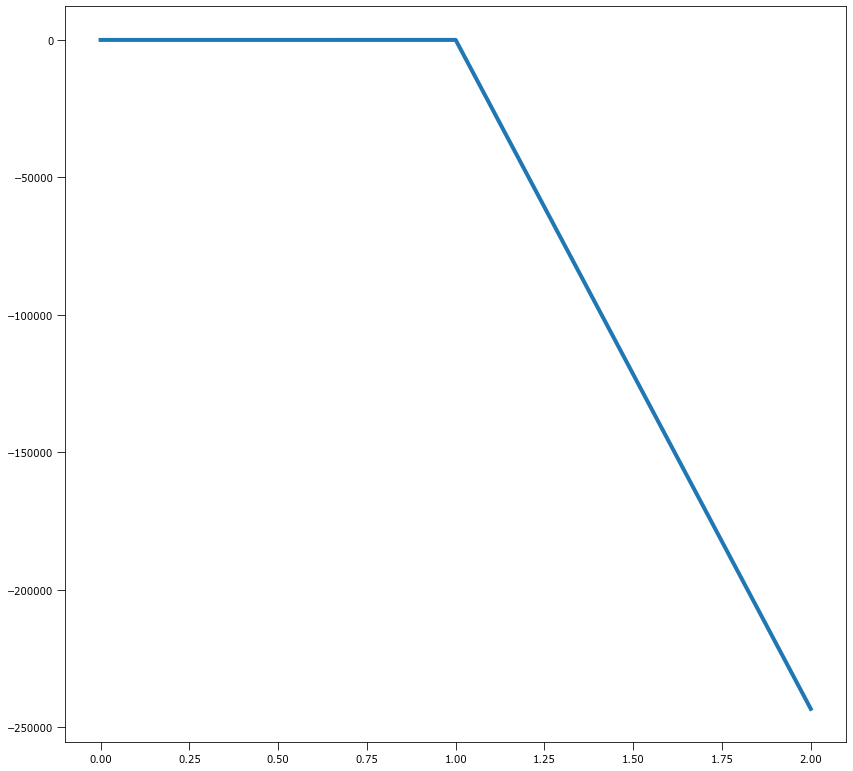

In [96]:
plt.plot(z)

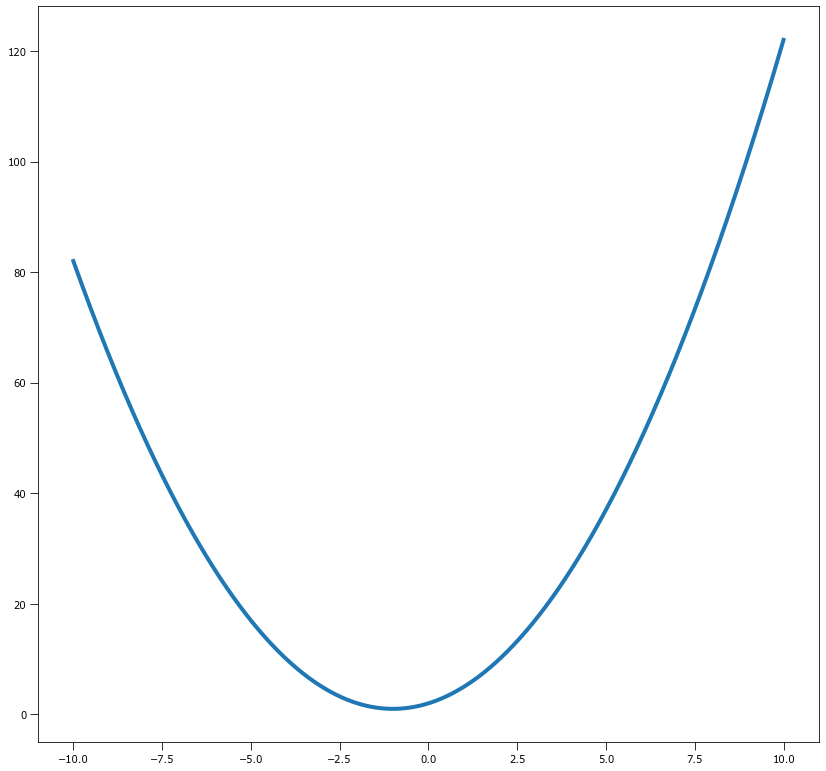

In [84]:
#len(color_arr[0][:])
# create 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, 1000)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 2  

fig, ax = plt.subplots()
ax.plot(x, y)
#fig, ax = plt.subplots()
#ax.plot(y, x)

In [76]:
#plt.plot(color_arr[0][:6000])#[0]

In [34]:
ee_lines

['JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,Comments,Transfomed,Airmass,Validation Flag,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit\n',
 '2456213.6972,10.65,,,Vis.,KMA,,104,108,SD2/03,,,,Z,,,,EE CEP,AAVSO,STD,,,,\n',
 '2456225.32597,10.552,0.007,,R,SJAR,,ENSEMBLE,000-BCQ-031,4147ADL,,0,1.027,Z,,11.124,,EE CEP,,STD,,,,\n',
 '2456225.32696,10.821,0.005,,V,SJAR,,ENSEMBLE,000-BCQ-031,4147ADL,,0,1.028,Z,,11.244,,EE CEP,,STD,,,,\n',
 '2456225.32742,11.148,0.008,,B,SJAR,,ENSEMBLE,000-BCQ-031,4147ADL,,0,1.028,Z,,11.453,,EE CEP,,STD,,,,\n',
 '2456225.32764,10.242,0.015,,I,SJAR,,ENSEMBLE,000-BCQ-031,4147ADL,,0,1.028,Z,,10.992,,EE CEP,,STD,,,,\n',
 '2456228.4778,11.0,,,Vis.,BVE,,104,112,1071PIS,,,,Z,,,,EE CEP,KNVWS,STD,,,,\n',
 '2456241.26972,10.838,0.006,,V,SJAR,,ENSEMBLE,000-BCQ-031,4147ADL,,0,1.019,Z,,11.236,,EE CEP,,STD,,,,\n',
 '2456241.27003,10.565,0.006,,R,SJAR,

In [32]:
print(all_pa)

[30.83116381 41.96380587 41.90562665 48.15986928 45.49496986 39.71195888
 39.23243082 42.4619067  37.82278951 41.08797502 41.4324975  45.86515227
 37.35629198 39.01128609 20.40296784 16.14999362 25.1393323  22.38809906
 19.52877302 22.9699368  25.155402   22.29795087 20.01514324 23.98821972
 30.37850458 23.42708449 25.359286   25.01690889 26.08282437 26.35309884
 16.41256669 12.02009302 26.15272219 26.3783241  26.87943697 13.04068303
 25.88782754 26.65752049 25.55153909 25.90561968 29.42910936 28.61672284
 28.46824447 30.88338696 31.44264439 27.72286749 26.45419804 25.64993851
 25.96948064 25.16961022 26.16415122 22.94790748 26.10152902 18.00156633
 18.62561875]


Plot q stability


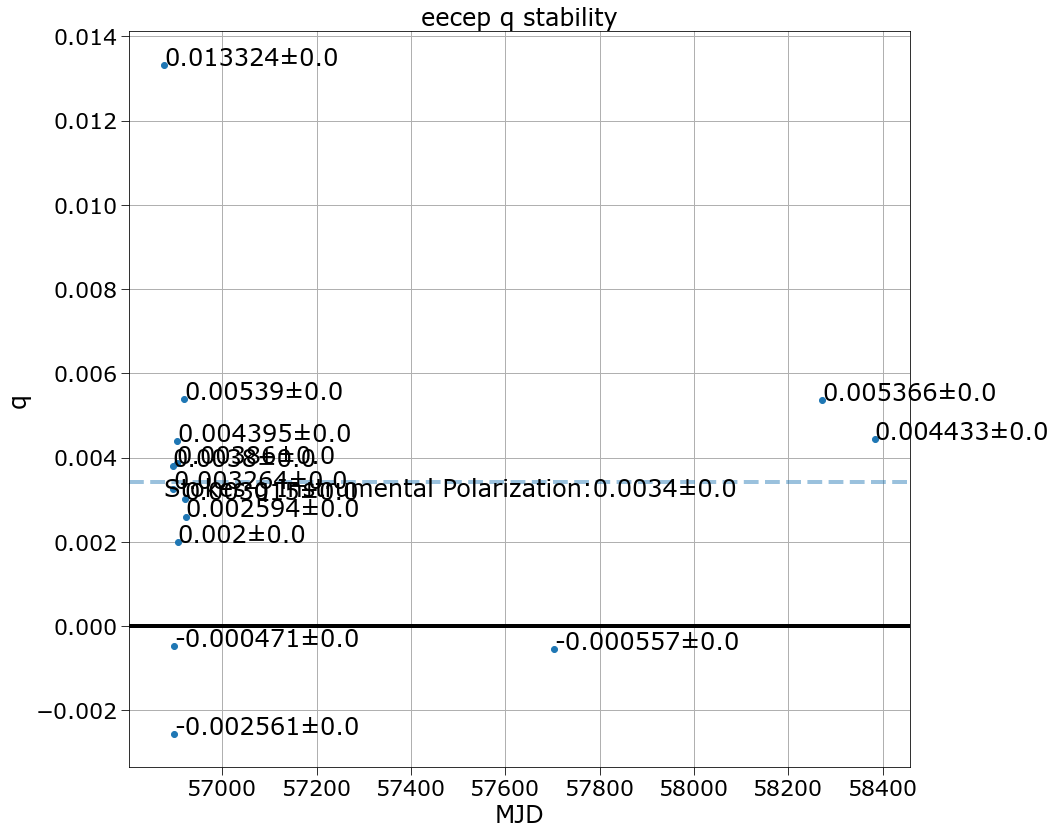

Plot u stability


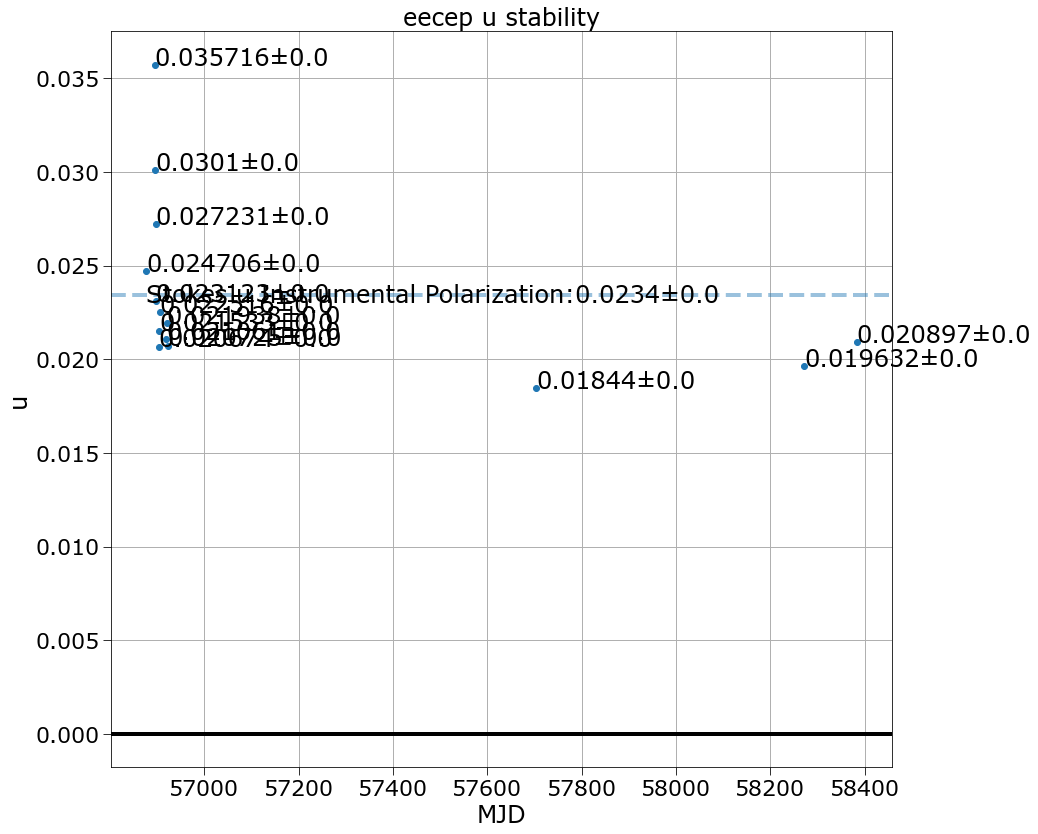

In [24]:
q_cal = funcs_polarimetry.plot_q_u_stability(data_list_eecep, 'q', './img_out/stability/EE Cephei_q_stab',  True,False, False, True)
u_cal = funcs_polarimetry.plot_q_u_stability(data_list_eecep, 'u', './img_out/stability/EE Cephei_u_stab', True,False, False, True)

In [20]:
#Why is it positive?
#And where the hell is the error bar?

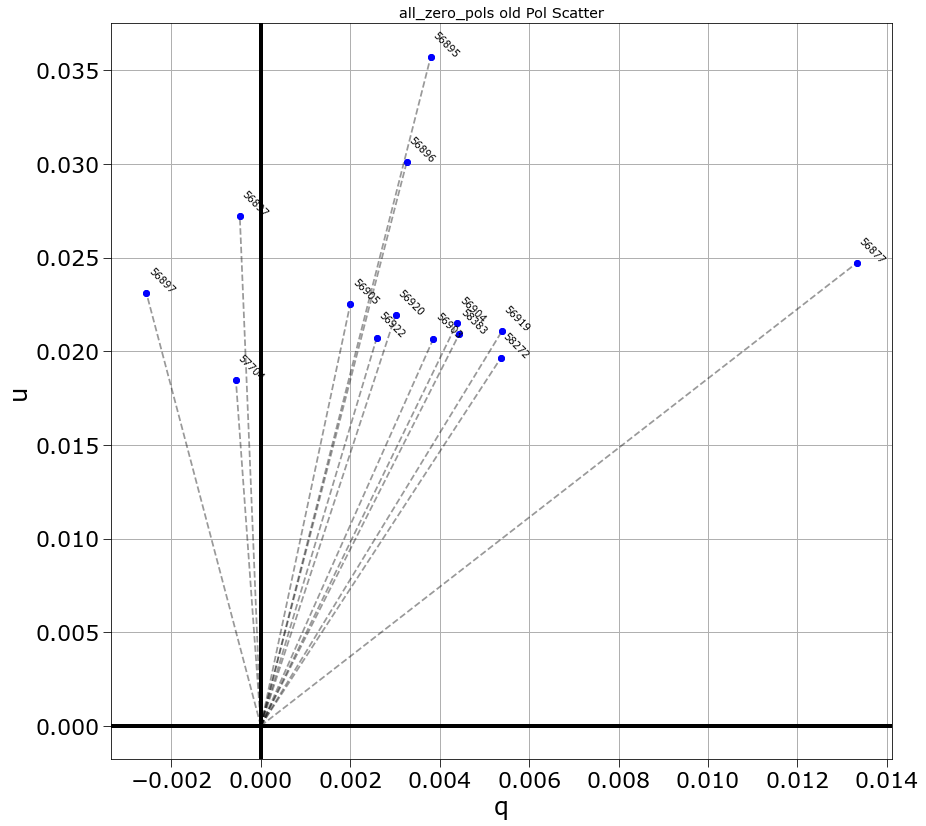

In [62]:
q_ori, qerr_ori, u_ori, uerr_ori = funcs_polarimetry.q_n_u_single_plot_v1(data_list_eecep, 'blue','./img_out/all_zero_pols old', 'zero_pol', True, True, True, True, True,False)

In [63]:
#funcs_polarimetry.q_n_u_single_plot_v1(data_list_eecep, 'blue','./img_out/add_new', 'target_pol', True, True, True, True, False)

In [12]:
data_list_eecep

[{'2014-08-08_eecep': (['q', 0.0133236892850826],
   ['q error', 0.00321031086772821],
   ['u', 0.0247058469990552],
   ['u error', 0.00323761813318303])},
 {'2014-08-26_eecep': (['q', 0.00379953923911065],
   ['q error', 0.00389014523340783],
   ['u', 0.0357160726636999],
   ['u error', 0.00387782707925997])},
 {'2014-08-27_eecep': (['q', 0.00326388038331546],
   ['q error', 0.00389661396056221],
   ['u', 0.0300995893477615],
   ['u error', 0.00373709088868117])},
 {'2014-08-28_eecep': (['q', -0.00256091077554087],
   ['q error', 0.00340150934113989],
   ['u', 0.0231234015372025],
   ['u error', 0.00340980117649456])},
 {'2014-08-28_eecep': (['q', -0.000470535461466047],
   ['q error', 0.00280257676991101],
   ['u', 0.0272309643175855],
   ['u error', 0.00281413282709517])},
 {'2014-09-03_eecep': (['q', 0.00386009779080649],
   ['q error', 0.00110615119891923],
   ['u', 0.0206739766635248],
   ['u error', 0.00111179454634414])},
 {'2014-09-04_eecep': (['q', 0.00439469727388076],
   ['

In [63]:
for dtime in MJD:
    t = Time(dtime, format='mjd', scale='utc')
    print(t)
    print(t.iso)
    print((t.iso[:len('2014-08-08')]))
    print((t.iso[:len('2014-08-08')])+'_eecep')
    print("\n")

56877.6331952
2014-08-08 15:11:48.065
2014-08-08
2014-08-08_eecep


56895.7909870362
2014-08-26 18:59:01.280
2014-08-26
2014-08-26_eecep


56896.7428162643
2014-08-27 17:49:39.325
2014-08-27
2014-08-27_eecep


56897.5762971174
2014-08-28 13:49:52.071
2014-08-28
2014-08-28_eecep


56897.7919773171
2014-08-28 19:00:26.840
2014-08-28
2014-08-28_eecep


56903.7731081611
2014-09-03 18:33:16.545
2014-09-03
2014-09-03_eecep


56904.7747447044
2014-09-04 18:35:37.942
2014-09-04
2014-09-04_eecep


56905.7757314164
2014-09-05 18:37:03.194
2014-09-05
2014-09-05_eecep


56919.7735355892
2014-09-19 18:33:53.475
2014-09-19
2014-09-19_eecep


56920.7456684075
2014-09-20 17:53:45.750
2014-09-20
2014-09-20_eecep


56922.7298003305
2014-09-22 17:30:54.749
2014-09-22
2014-09-22_eecep


57704.6007480663
2016-11-12 14:25:04.633
2016-11-12
2016-11-12_eecep


58272.7795146601
2018-06-03 18:42:30.067
2018-06-03
2018-06-03_eecep


58383.7038080893
2018-09-22 16:53:29.019
2018-09-22
2018-09-22_eecep


